In [2]:
pip install pandas seaborn matplotlib scipy

  Using cached matplotlib-3.7.5-cp38-cp38-macosx_11_0_arm64.whl.metadata (5.7 kB)
  Using cached contourpy-1.1.1-cp38-cp38-macosx_11_0_arm64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp38-cp38-macosx_10_9_universal2.whl.metadata (102 kB)
  Using cached kiwisolver-1.4.7-cp38-cp38-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-10.4.0-cp38-cp38-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.7.5-cp38-cp38-macosx_11_0_arm64.whl (7.3 MB)
Using cached contourpy-1.1.1-cp38-cp38-macosx_11_0_arm64.whl (232 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp38-cp38-macosx_10_9_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.7-cp38-cp38-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-10.4.0-cp38-cp38-macosx_11_0_arm64.whl (3.4 MB)
Using cached pyparsing-3.1.4-py3-none-any.whl (104 

In [ ]:
!pwd 

zsh:pwd:1: too many arguments


In [34]:
!cd ..

In [36]:
!ls ..

__pycache__             environment.yml         README_MVA.md
ABIDEParser.py          fetch_data.py           readme.md
ADHDParser.py           gcn                     requirements.txt
ADNI_IDs.txt            LICENSE.txt             results
data                    main_ABIDE.py           subject_IDs.txt
diagnostic_adhd_full.py main_ADHD.py            train_GCN.py
diagnostique.py         notebook
environment_aicha.yml   read_mat_file.py


In [38]:
import os
os.chdir("../results")
print(os.getcwd())


/Users/camillekoczo/Desktop/MVA/Semestre_1/GEOMETRIC DATA ANALYSIS/population-gcn/results


In [39]:
print(os.listdir())


['plot_results.ipynb', '.DS_Store', 'ADHD_results', 'results_folds1', 'results_folds10', 'comparaison_HO_AAL_horizontal.png', 'overfit', 'ABIDE_results', 'plot_results.py', 'resultats_comparatifs_boxplot_horizontal.png']


Chargement et traitement des fichiers...
⚠️  MANQUANT : ABIDE_results/ABIDE_classification.mat


/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/3852595654.py:126: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df,



✅ Graphique final généré avec succès : Resultats_Finaux_ABIDE_ADHD.png


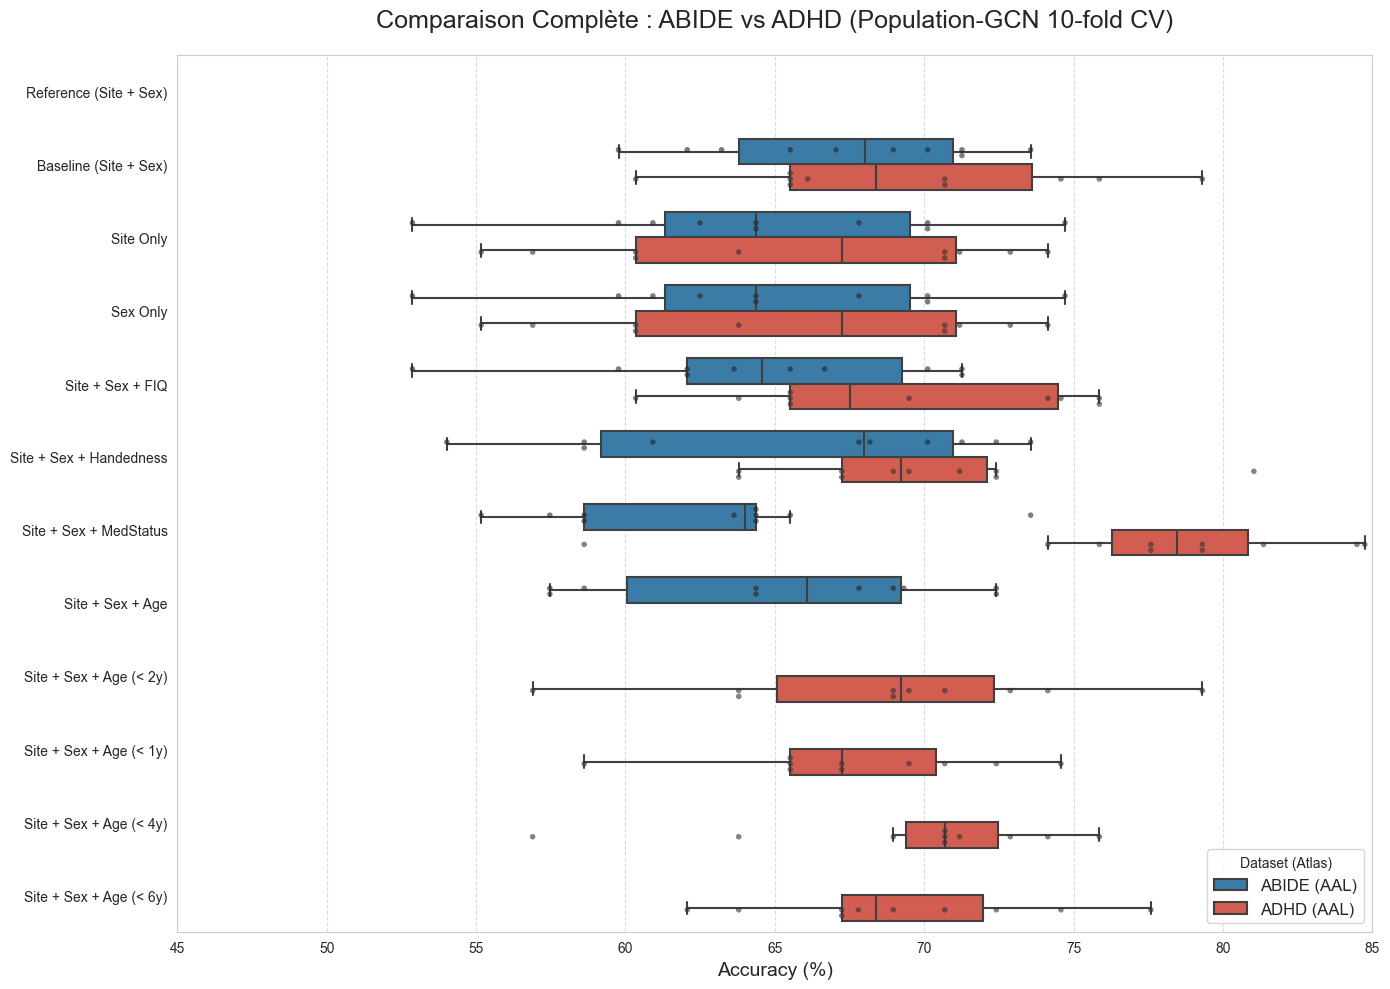

In [40]:
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 1. CONFIGURATION DES CHEMINS ET DES FICHIERS ---

# Dossiers contenant les résultats
abide_dir = 'ABIDE_results'
adhd_dir = 'ADHD_results'

# Dictionnaire de Mapping : (Dataset_Name, Label_Anglais) -> Nom_Fichier
# La clé est un tuple : ('Nom du Dataset pour la légende', 'Nom de la configuration')
files_map = {
    # --- REFERENCE ABIDE (HO) ---
    ('ABIDE (HO)', 'Reference (Site + Sex)'): os.path.join(abide_dir, 'ABIDE_classification.mat'),

    # --- ABIDE (AAL) ---
    ('ABIDE (AAL)', 'Baseline (Site + Sex)'):      os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_SEX_SITE.mat'),
    ('ABIDE (AAL)', 'Site Only'):                  os.path.join(abide_dir, 'ABIDE_classification_Site.mat'),
    ('ABIDE (AAL)', 'Sex Only'):                   os.path.join(abide_dir, 'ABIDE_classification_Sexe.mat'),
    ('ABIDE (AAL)', 'Site + Sex + Age'):           os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_AGE_SEX_SITE.mat'),
    ('ABIDE (AAL)', 'Site + Sex + FIQ'):           os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_FIQ_SEX_SITE.mat'),
    ('ABIDE (AAL)', 'Site + Sex + Handedness'):    os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_Handedness_SEX_SITE.mat'),
    ('ABIDE (AAL)', 'Site + Sex + MedStatus'):     os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_MedStatus_SEX_SITE.mat'),

    # --- ADHD (AAL) - BASELINE & ABLATION ---
    ('ADHD (AAL)', 'Baseline (Site + Sex)'):       os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site.mat'),
    ('ADHD (AAL)', 'Site Only'):                   os.path.join(adhd_dir, 'ADHD_classification_Site.mat'),
    ('ADHD (AAL)', 'Sex Only'):                    os.path.join(adhd_dir, 'ADHD_classification_Sexe.mat'),

    # --- ADHD (AAL) - HYPOTHESES CLINIQUES ---
    ('ADHD (AAL)', 'Site + Sex + FIQ'):            os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_FIQ.mat'),
    ('ADHD (AAL)', 'Site + Sex + Handedness'):     os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Handedness.mat'),
    ('ADHD (AAL)', 'Site + Sex + MedStatus'):      os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_MedStatus.mat'),

    # --- ADHD (AAL) - SENSIBILITE AGE ---
    # Note : Age < 2 ans est le standard utilisé dans ABIDE/Parisot
    ('ADHD (AAL)', 'Site + Sex + Age (< 2y)'):     os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-2ans.mat'),
    ('ADHD (AAL)', 'Site + Sex + Age (< 1y)'):     os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-1ans.mat'),
    ('ADHD (AAL)', 'Site + Sex + Age (< 4y)'):     os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-4ans.mat'),
    ('ADHD (AAL)', 'Site + Sex + Age (< 6y)'):     os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-6ans.mat'),
}

# Ordre d'affichage sur le graphique (de haut en bas)
plot_order = [
    'Reference (Site + Sex)',       # Le Gold Standard
    'Baseline (Site + Sex)',        # La comparaison directe
    'Site Only',                    # Ablation
    'Sex Only',                     # Ablation
    'Site + Sex + FIQ',             # Hypothèse Cognitive
    'Site + Sex + Handedness',      # Hypothèse Latéralité
    'Site + Sex + MedStatus',       # Hypothèse Médication
    'Site + Sex + Age',             # ABIDE Age standard
    'Site + Sex + Age (< 2y)',      # ADHD Age Standard
    'Site + Sex + Age (< 1y)',      # ADHD Age Strict
    'Site + Sex + Age (< 4y)',      # ADHD Age Large
    'Site + Sex + Age (< 6y)'       # ADHD Age Très Large
]

# --- 2. EXTRACTION DES DONNEES ---
data = []

print("Chargement et traitement des fichiers...")
for (dataset, config), filename in files_map.items():
    if not os.path.exists(filename):
        print(f"⚠️  MANQUANT : {filename}")
        continue
        
    try:
        mat = sio.loadmat(filename)
        
        # Vérification et extraction des scores
        if 'acc' in mat:
            # Aplatir les tableaux
            acc_counts = mat['acc'].flatten()
            
            # Gestion des folds (si présents) pour calculer le % exact
            if 'folds' in mat:
                fold_sizes = mat['folds'].flatten()
                accuracies = (acc_counts / fold_sizes) * 100
            else:
                # Fallback si 'folds' n'est pas sauvegardé (peu probable avec votre code)
                # On suppose que acc contient déjà des pourcentages ou on alerte
                if np.mean(acc_counts) > 1: # Si c'est des comptes > 1
                    print(f"⚠️  Attention: 'folds' manquant pour {config}, calcul approximatif.")
                    accuracies = (acc_counts / 58) * 100 # Approx pour ADHD (582/10)
                else:
                    accuracies = acc_counts * 100

            # Ajout des 10 points de données (1 par fold)
            for acc in accuracies:
                data.append({
                    'Dataset': dataset,
                    'Configuration': config,
                    'Accuracy (%)': acc
                })
        else:
            print(f"⚠️  Clé 'acc' manquante dans {filename}")
            
    except Exception as e:
        print(f"❌ Erreur lecture {filename}: {e}")

# Création du DataFrame Pandas
df = pd.DataFrame(data)

# --- 3. CREATION DU GRAPHIQUE (BOXPLOT HORIZONTAL) ---
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10)) # Grande taille pour tout afficher

# Palette de couleurs personnalisée
palette = {
    'ABIDE (HO)': '#27ae60',   # Vert (Référence)
    'ABIDE (AAL)': '#2980b9',  # Bleu (Baseline)
    'ADHD (AAL)': '#e74c3c'    # Rouge (Focus)
}

# Dessin du Boxplot
ax = sns.boxplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df, 
                 order=plot_order, palette=palette, 
                 width=0.7, linewidth=1.5, fliersize=0) # fliersize=0 cache les outliers du boxplot (le swarmplot les montrera)

# Ajout des points individuels (Swarmplot) pour la transparence scientifique
sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df, 
              order=plot_order, dodge=True, size=4, color=".2", alpha=0.6, orient="h")

# --- 4. MISE EN FORME ET ESTHÉTIQUE ---
plt.title('Comparaison Complète : ABIDE vs ADHD (Population-GCN 10-fold CV)', fontsize=18, pad=20)
plt.xlabel('Accuracy (%)', fontsize=14)
plt.ylabel('', fontsize=14) # Pas de label Y, les catégories suffisent

# Ajustement des axes (Zoom sur la zone d'intérêt 50-80%)
plt.xlim(45, 85)

# Gestion de la légende (On évite les doublons créés par le swarmplot)
handles, labels = ax.get_legend_handles_labels()
# On ne garde que les entrées uniques correspondant aux Datasets
unique_legend = {}
for h, l in zip(handles, labels):
    if l not in unique_legend:
        unique_legend[l] = h
plt.legend(unique_legend.values(), unique_legend.keys(), title='Dataset (Atlas)', fontsize=12, loc='lower right')

# Grille verticale légère pour faciliter la lecture
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

# --- 5. SAUVEGARDE ---
output_file = 'Resultats_Finaux_ABIDE_ADHD.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"\n✅ Graphique final généré avec succès : {output_file}")

plt.show()

Traitement des fichiers...

✅ Graphique sauvegardé sous : Resultats_Finaux_Blocks.png


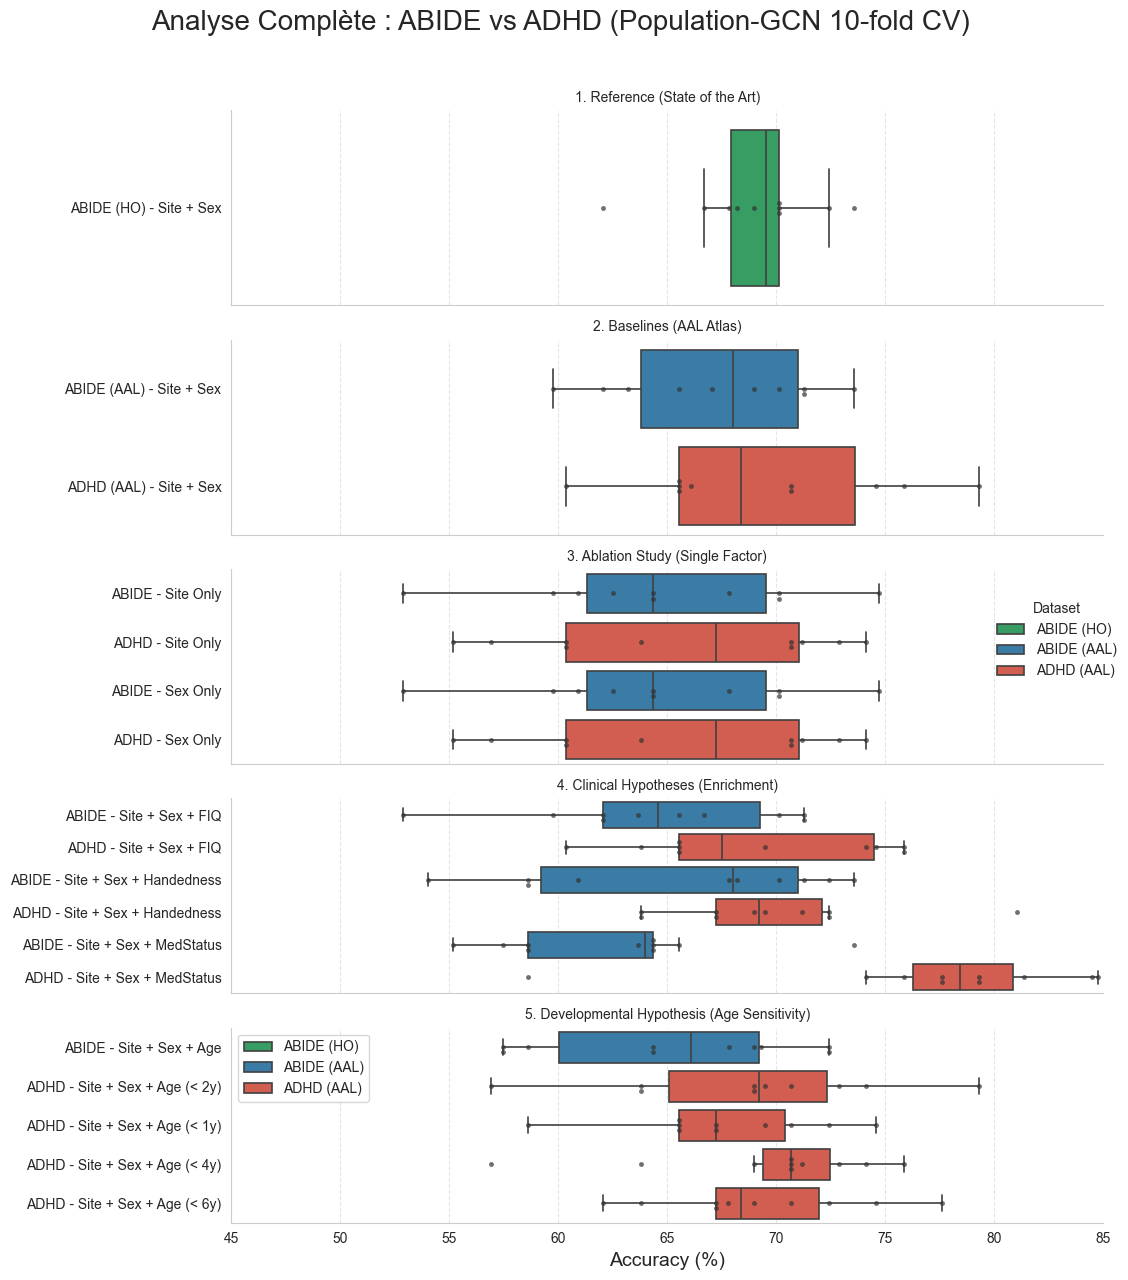

In [42]:
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 1. CONFIGURATION : CHEMINS ET MAPPING ---

abide_dir = 'ABIDE_results'
adhd_dir = 'ADHD_results'

# Structure : (Category, Label_Anglais, Dataset_Color) -> Fichier
# Category : Le nom du Bloc
# Label : Le texte à afficher sur l'axe Y
# Dataset_Color : Pour colorier différemment ABIDE (Bleu/Vert) et ADHD (Rouge)

files_config = [
    # --- BLOCK 1 : REFERENCE ---
    {
        'Block': '1. Reference (State of the Art)',
        'Label': 'ABIDE (HO) - Site + Sex',
        'Dataset': 'ABIDE (HO)',
        'File': os.path.join(abide_dir, 'ABIDE_classification.mat')
    },

    # --- BLOCK 2 : BASELINES (COMPARISON) ---
    {
        'Block': '2. Baselines (AAL Atlas)',
        'Label': 'ABIDE (AAL) - Site + Sex',
        'Dataset': 'ABIDE (AAL)',
        'File': os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_SEX_SITE.mat')
    },
    {
        'Block': '2. Baselines (AAL Atlas)',
        'Label': 'ADHD (AAL) - Site + Sex',
        'Dataset': 'ADHD (AAL)',
        'File': os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site.mat')
    },

    # --- BLOCK 3 : ABLATION STUDY ---
    {
        'Block': '3. Ablation Study (Single Factor)',
        'Label': 'ABIDE - Site Only',
        'Dataset': 'ABIDE (AAL)',
        'File': os.path.join(abide_dir, 'ABIDE_classification_Site.mat')
    },
    {
        'Block': '3. Ablation Study (Single Factor)',
        'Label': 'ADHD - Site Only',
        'Dataset': 'ADHD (AAL)',
        'File': os.path.join(adhd_dir, 'ADHD_classification_Site.mat')
    },
    {
        'Block': '3. Ablation Study (Single Factor)',
        'Label': 'ABIDE - Sex Only',
        'Dataset': 'ABIDE (AAL)',
        'File': os.path.join(abide_dir, 'ABIDE_classification_Sexe.mat')
    },
    {
        'Block': '3. Ablation Study (Single Factor)',
        'Label': 'ADHD - Sex Only',
        'Dataset': 'ADHD (AAL)',
        'File': os.path.join(adhd_dir, 'ADHD_classification_Sexe.mat')
    },

    # --- BLOCK 4 : CLINICAL HYPOTHESES ---
    {
        'Block': '4. Clinical Hypotheses (Enrichment)',
        'Label': 'ABIDE - Site + Sex + FIQ',
        'Dataset': 'ABIDE (AAL)',
        'File': os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_FIQ_SEX_SITE.mat')
    },
    {
        'Block': '4. Clinical Hypotheses (Enrichment)',
        'Label': 'ADHD - Site + Sex + FIQ',
        'Dataset': 'ADHD (AAL)',
        'File': os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_FIQ.mat')
    },
    {
        'Block': '4. Clinical Hypotheses (Enrichment)',
        'Label': 'ABIDE - Site + Sex + Handedness',
        'Dataset': 'ABIDE (AAL)',
        'File': os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_Handedness_SEX_SITE.mat')
    },
    {
        'Block': '4. Clinical Hypotheses (Enrichment)',
        'Label': 'ADHD - Site + Sex + Handedness',
        'Dataset': 'ADHD (AAL)',
        'File': os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Handedness.mat')
    },
    {
        'Block': '4. Clinical Hypotheses (Enrichment)',
        'Label': 'ABIDE - Site + Sex + MedStatus',
        'Dataset': 'ABIDE (AAL)',
        'File': os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_MedStatus_SEX_SITE.mat')
    },
    {
        'Block': '4. Clinical Hypotheses (Enrichment)',
        'Label': 'ADHD - Site + Sex + MedStatus',
        'Dataset': 'ADHD (AAL)',
        'File': os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_MedStatus.mat')
    },

    # --- BLOCK 5 : DEVELOPMENTAL (AGE) ---
    # Ici on regroupe ABIDE Age et ADHD Age < 2y ensemble comme demandé
    {
        'Block': '5. Developmental Hypothesis (Age Sensitivity)',
        'Label': 'ABIDE - Site + Sex + Age',
        'Dataset': 'ABIDE (AAL)',
        'File': os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_AGE_SEX_SITE.mat')
    },
    {
        'Block': '5. Developmental Hypothesis (Age Sensitivity)',
        'Label': 'ADHD - Site + Sex + Age (< 2y)',
        'Dataset': 'ADHD (AAL)',
        'File': os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-2ans.mat')
    },
    {
        'Block': '5. Developmental Hypothesis (Age Sensitivity)',
        'Label': 'ADHD - Site + Sex + Age (< 1y)',
        'Dataset': 'ADHD (AAL)',
        'File': os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-1ans.mat')
    },
    {
        'Block': '5. Developmental Hypothesis (Age Sensitivity)',
        'Label': 'ADHD - Site + Sex + Age (< 4y)',
        'Dataset': 'ADHD (AAL)',
        'File': os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-4ans.mat')
    },
    {
        'Block': '5. Developmental Hypothesis (Age Sensitivity)',
        'Label': 'ADHD - Site + Sex + Age (< 6y)',
        'Dataset': 'ADHD (AAL)',
        'File': os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-6ans.mat')
    },
]

# --- 2. EXTRACTION DES DONNÉES ---
data = []

print("Traitement des fichiers...")
for entry in files_config:
    filepath = entry['File']
    if not os.path.exists(filepath):
        print(f"⚠️ MANQUANT : {filepath}")
        # On ajoute une donnée vide pour garder la ligne dans le graphe (optionnel)
        continue
        
    try:
        mat = sio.loadmat(filepath)
        if 'acc' in mat:
            acc_counts = mat['acc'].flatten()
            if 'folds' in mat:
                fold_sizes = mat['folds'].flatten()
                accuracies = (acc_counts / fold_sizes) * 100
            else:
                # Fallback si folds manquant (peu probable)
                if np.mean(acc_counts) > 1:
                    accuracies = (acc_counts / 58) * 100 
                else:
                    accuracies = acc_counts * 100

            for acc in accuracies:
                data.append({
                    'Block': entry['Block'],
                    'Configuration': entry['Label'],
                    'Dataset': entry['Dataset'],
                    'Accuracy (%)': acc
                })
    except Exception as e:
        print(f"❌ Erreur {filepath}: {e}")

df = pd.DataFrame(data)

# --- 3. CRÉATION DU GRAPHIQUE (FACETGRID) ---
sns.set_style("whitegrid")

# Palette de couleurs : Vert (HO), Bleu (ABIDE), Rouge (ADHD)
palette = {
    'ABIDE (HO)': '#27ae60', 
    'ABIDE (AAL)': '#2980b9', 
    'ADHD (AAL)': '#e74c3c'
}

# Création de la grille (1 ligne par Bloc)
# sharex=True : tous les graphiques partagent l'axe X (Accuracy)
# height & aspect contrôlent la taille des sous-graphiques
g = sns.catplot(
    data=df, x='Accuracy (%)', y='Configuration', 
    row='Block', hue='Dataset', kind='box',
    palette=palette, dodge=False, # dodge=False pour aligner les boîtes
    height=2.5, aspect=4, sharey=False, sharex=True,
    linewidth=1.2, fliersize=0 # fliersize=0 cache les outliers boites (le swarm les montre)
)

# Ajout des points (Swarmplot) sur chaque sous-graphique
# On doit itérer sur les axes car catplot crée une grille
for ax in g.axes.flat:
    # On récupère le titre du bloc courant pour filtrer les données
    # Astuce : le titre est défini par row_template, on peut le parser ou utiliser les données du graphe
    # Plus simple : on redessine un swarmplot sur l'axe courant avec les bonnes données
    
    # Récupération des labels Y de ce sous-graphe
    y_labels = [label.get_text() for label in ax.get_yticklabels()]
    
    # Filtrage du dataframe pour ces labels uniquement
    sub_df = df[df['Configuration'].isin(y_labels)]
    
    if not sub_df.empty:
        sns.swarmplot(
            data=sub_df, x='Accuracy (%)', y='Configuration', 
            color=".2", size=3.5, alpha=0.7, orient="h", ax=ax
        )

# --- 4. ESTHÉTIQUE ---
# Titre principal
g.fig.suptitle('Analyse Complète : ABIDE vs ADHD (Population-GCN 10-fold CV)', fontsize=20, y=1.02)

# Ajustement des titres de blocs
g.set_titles(row_template='{row_name}') # Affiche juste le nom du bloc

# Axe X (Accuracy)
g.set(xlim=(45, 85)) # Zoom sur la zone intéressante
for ax in g.axes.flat:
    ax.set_xlabel('') # Enlève label X intermédiaire
    ax.set_ylabel('') # Enlève label Y
    ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Label X final en bas
g.axes.flat[-1].set_xlabel('Accuracy (%)', fontsize=14)

# Légende (nettoyage)
# catplot gère la légende automatiquement à droite

plt.tight_layout()

# --- 5. SAUVEGARDE ---
output_file = 'Resultats_Finaux_Blocks.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"\n✅ Graphique sauvegardé sous : {output_file}")

plt.show()

/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/3688970633.py:111: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df_block,
/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/3688970633.py:111: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df_block,
/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/3688970633.py:111: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df_block,
/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipy


✅ Graphique sauvegardé sous : Resultats_Finaux_Blocks_Proportionnels.png


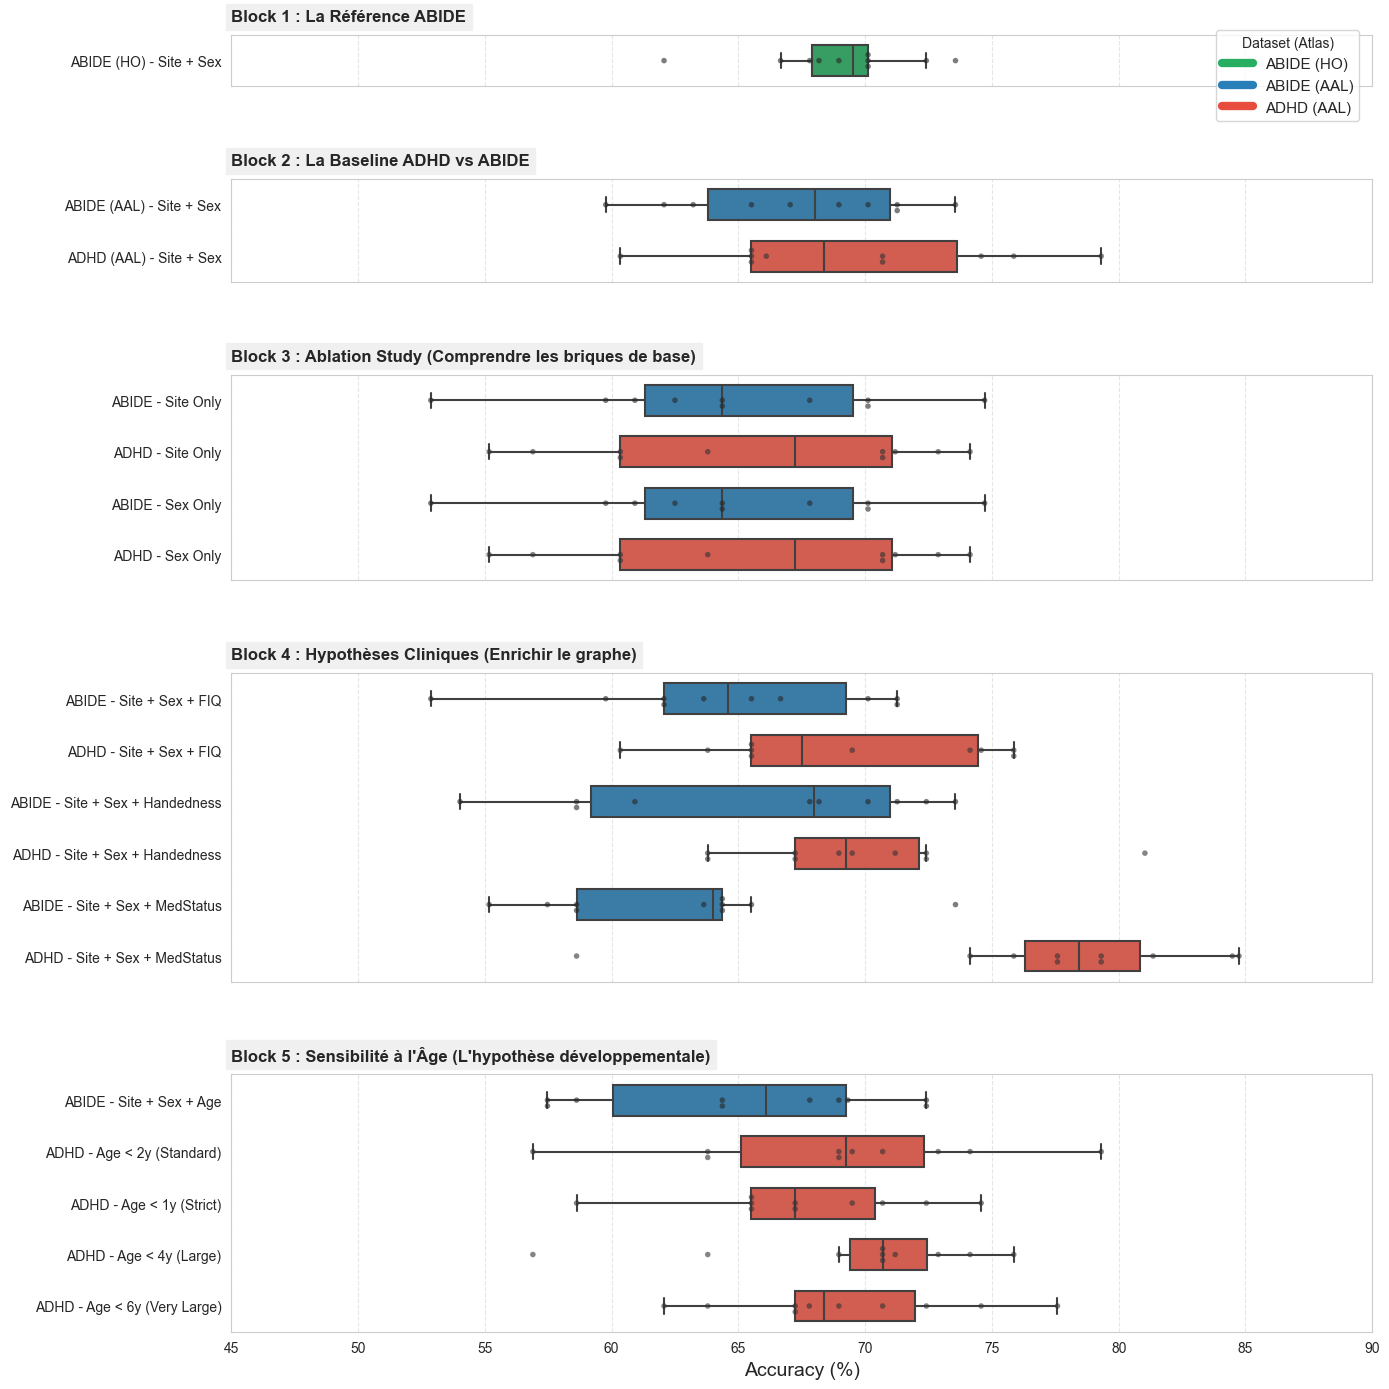

In [48]:
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 1. CONFIGURATION ---
abide_dir = 'ABIDE_results'
adhd_dir = 'ADHD_results'

# On définit les blocs avec leur contenu exact
# Structure : Titre_Bloc -> Liste de (Label_Axe_Y, Dataset_Color, Fichier)
blocks_config = {
    "Block 1 : La Référence ABIDE": [
        ('ABIDE (HO) - Site + Sex', 'ABIDE (HO)', os.path.join(abide_dir, 'ABIDE_classification.mat'))
    ],
    "Block 2 : La Baseline ADHD vs ABIDE": [
        ('ABIDE (AAL) - Site + Sex', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_SEX_SITE.mat')),
        ('ADHD (AAL) - Site + Sex', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site.mat'))
    ],
    "Block 3 : Ablation Study (Comprendre les briques de base)": [
        ('ABIDE - Site Only', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_Site.mat')),
        ('ADHD - Site Only', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Site.mat')),
        ('ABIDE - Sex Only', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_Sexe.mat')),
        ('ADHD - Sex Only', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe.mat'))
    ],
    "Block 4 : Hypothèses Cliniques (Enrichir le graphe)": [
        ('ABIDE - Site + Sex + FIQ', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_FIQ_SEX_SITE.mat')),
        ('ADHD - Site + Sex + FIQ', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_FIQ.mat')),
        ('ABIDE - Site + Sex + Handedness', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_Handedness_SEX_SITE.mat')),
        ('ADHD - Site + Sex + Handedness', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Handedness.mat')),
        ('ABIDE - Site + Sex + MedStatus', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_MedStatus_SEX_SITE.mat')),
        ('ADHD - Site + Sex + MedStatus', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_MedStatus.mat'))
    ],
    "Block 5 : Sensibilité à l'Âge (L'hypothèse développementale)": [
        ('ABIDE - Site + Sex + Age', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_AGE_SEX_SITE.mat')),
        ('ADHD - Age < 2y (Standard)', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-2ans.mat')),
        ('ADHD - Age < 1y (Strict)', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-1ans.mat')),
        ('ADHD - Age < 4y (Large)', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-4ans.mat')),
        ('ADHD - Age < 6y (Very Large)', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-6ans.mat'))
    ]
}

# --- 2. EXTRACTION ET PRÉPARATION ---
dfs = {} # Un dataframe par bloc
block_sizes = [] # Pour calculer la hauteur relative des graphiques

for block_name, items in blocks_config.items():
    block_data = []
    
    for label, dataset_tag, filepath in items:
        if not os.path.exists(filepath):
            print(f"⚠️ MANQUANT ({block_name}): {filepath}")
            # On ajoute une entrée vide pour garder la place visuelle
            block_data.append({'Configuration': label, 'Dataset': dataset_tag, 'Accuracy (%)': np.nan})
            continue
            
        try:
            mat = sio.loadmat(filepath)
            if 'acc' in mat:
                acc_counts = mat['acc'].flatten()
                if 'folds' in mat:
                    fold_sizes = mat['folds'].flatten()
                    accuracies = (acc_counts / fold_sizes) * 100
                else:
                    accuracies = (acc_counts / 58) * 100 # Fallback

                for acc in accuracies:
                    block_data.append({
                        'Configuration': label,
                        'Dataset': dataset_tag,
                        'Accuracy (%)': acc
                    })
        except Exception as e:
            print(f"❌ Erreur {filepath}: {e}")
    
    dfs[block_name] = pd.DataFrame(block_data)
    block_sizes.append(len(items)) # Nombre de lignes dans ce bloc

# --- 3. CRÉATION DU GRAPHIQUE COMPOSÉ ---
sns.set_style("whitegrid")

# Calcul de la hauteur totale : on donne une hauteur fixe par ligne (ex: 0.8 inch par barre) + espace pour les titres
height_ratios = [n for n in block_sizes]
total_height = sum(height_ratios) * 0.5 + len(blocks_config) * 1.0 # Ajustement empirique pour être joli

fig, axes = plt.subplots(len(blocks_config), 1, figsize=(14, total_height), 
                         gridspec_kw={'height_ratios': height_ratios}, sharex=True)

# Palette
palette = {
    'ABIDE (HO)': '#27ae60',   # Vert
    'ABIDE (AAL)': '#2980b9',  # Bleu
    'ADHD (AAL)': '#e74c3c'    # Rouge
}

# Boucle de dessin sur chaque sous-graphique
for i, (block_name, df_block) in enumerate(dfs.items()):
    ax = axes[i]
    
    # Ordre local : on veut garder l'ordre défini dans blocks_config
    local_order = [item[0] for item in blocks_config[block_name]]
    
    # Boxplot
    sns.boxplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df_block, 
                order=local_order, palette=palette, dodge=False,
                width=0.6, linewidth=1.5, fliersize=0, ax=ax)
    
    # Swarmplot
    sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df_block, 
                  order=local_order, dodge=False, size=4, color=".2", alpha=0.6, orient="h", ax=ax)
    
    # Esthétique du bloc
    ax.set_title(block_name, loc='left', fontsize=12, fontweight='bold', pad=10, backgroundcolor='#f0f0f0')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.legend_.remove() # On enlève la légende de chaque sous-graphe
    
    # Grille verticale
    ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Ajustements globaux
axes[-1].set_xlabel('Accuracy (%)', fontsize=14)
plt.xlim(45, 90) # Zoom commun

# Légende unique (On la recrée manuellement pour être propre)
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='#27ae60', lw=6, label='ABIDE (HO)'),
    Line2D([0], [0], color='#2980b9', lw=6, label='ABIDE (AAL)'),
    Line2D([0], [0], color='#e74c3c', lw=6, label='ADHD (AAL)')
]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.98), 
           title='Dataset (Atlas)', fontsize=11, frameon=True)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5) # Espace entre les blocs

# --- 4. SAUVEGARDE ---
output_file = 'Resultats_Finaux_Blocks_Proportionnels.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"\n✅ Graphique sauvegardé sous : {output_file}")

plt.show()

Traitement des fichiers...


/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/2834478799.py:166: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df_block,
/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/2834478799.py:166: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df_block,
/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/2834478799.py:166: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df_block,
/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipy


✅ Graphique sauvegardé : Resultats_Comparatifs_Moyennes.png


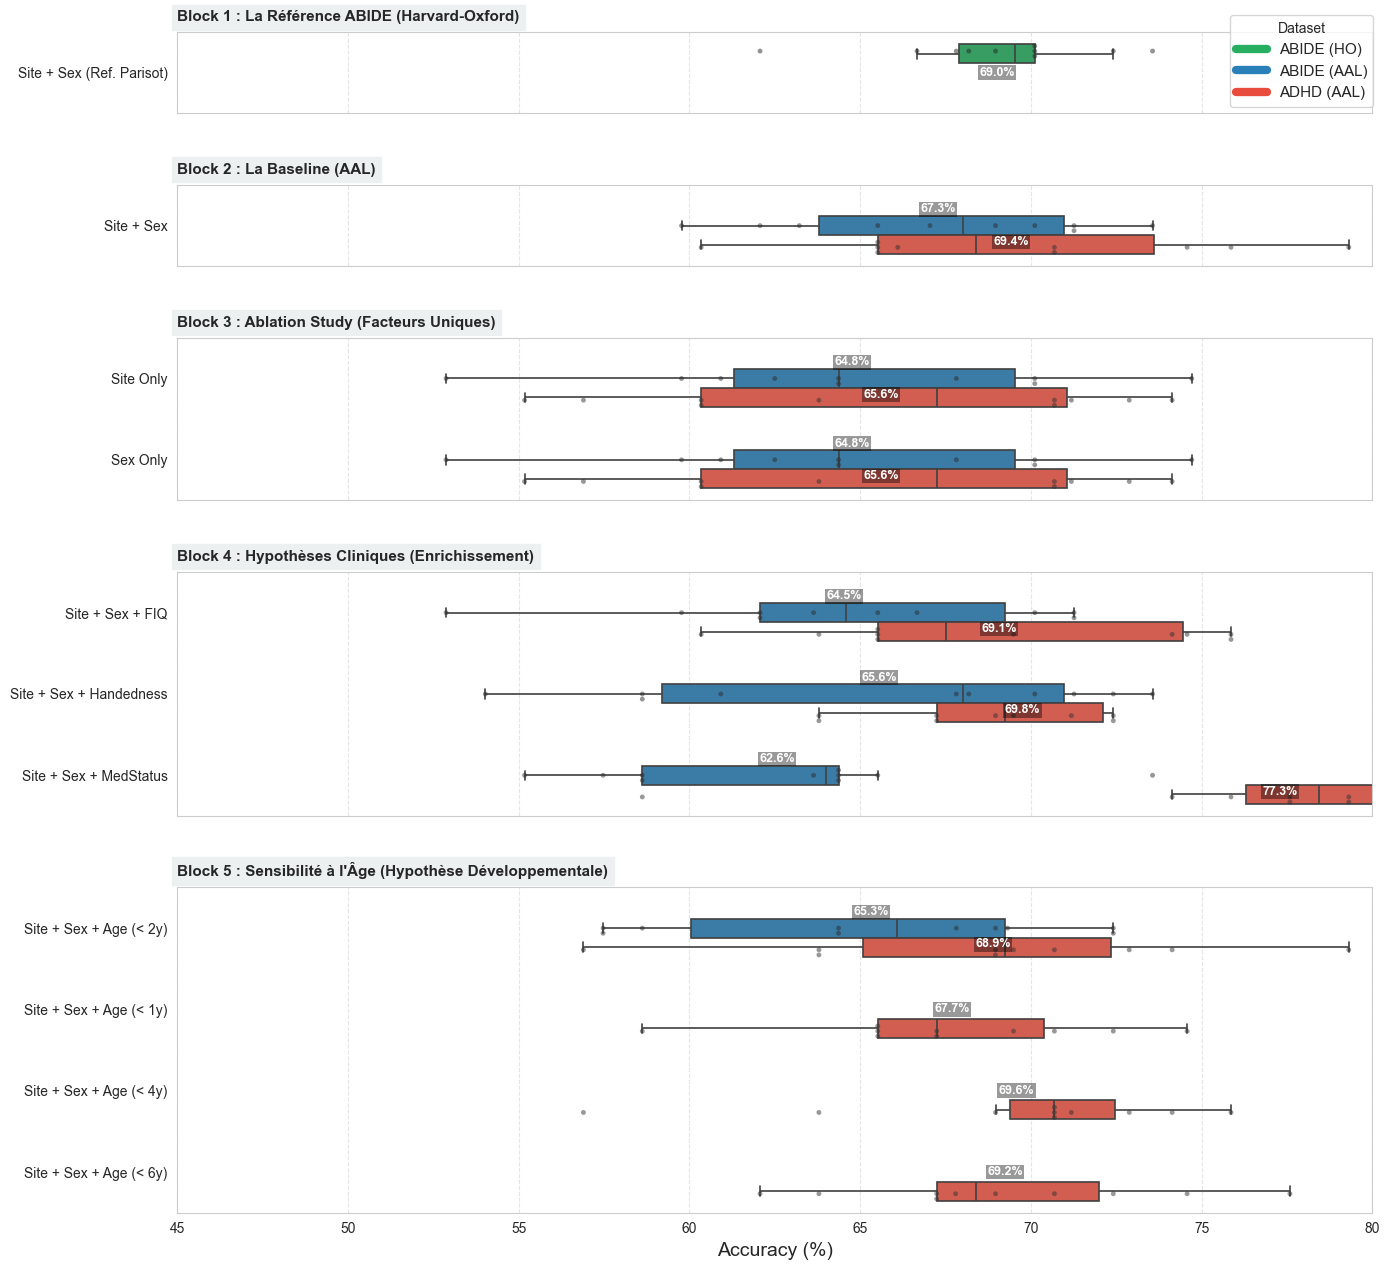

In [49]:
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 1. CONFIGURATION ---
abide_dir = 'ABIDE_results'
adhd_dir = 'ADHD_results'

# CONFIGURATION DES BLOCS
# Format : Titre_Bloc -> Liste de (Label_Commun_Y, Dataset_Tag, Fichier)
# Astuce : Donnez le MÊME "Label_Commun_Y" pour ABIDE et ADHD pour qu'ils soient sur la même ligne !

blocks_config = {
    "Block 1 : La Référence ABIDE (Harvard-Oxford)": [
        ('Site + Sex (Ref. Parisot)', 'ABIDE (HO)', os.path.join(abide_dir, 'ABIDE_classification.mat'))
    ],
    "Block 2 : La Baseline (AAL)": [
        ('Site + Sex', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_SEX_SITE.mat')),
        ('Site + Sex', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site.mat'))
    ],
    "Block 3 : Ablation Study (Facteurs Uniques)": [
        ('Site Only', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_Site.mat')),
        ('Site Only', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Site.mat')),
        ('Sex Only', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_Sexe.mat')),
        ('Sex Only', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe.mat'))
    ],
    "Block 4 : Hypothèses Cliniques (Enrichissement)": [
        ('Site + Sex + FIQ', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_FIQ_SEX_SITE.mat')),
        ('Site + Sex + FIQ', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_FIQ.mat')),
        ('Site + Sex + Handedness', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_Handedness_SEX_SITE.mat')),
        ('Site + Sex + Handedness', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Handedness.mat')),
        ('Site + Sex + MedStatus', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_MedStatus_SEX_SITE.mat')),
        ('Site + Sex + MedStatus', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_MedStatus.mat'))
    ],
    "Block 5 : Sensibilité à l'Âge (Hypothèse Développementale)": [
        # ICI : Regroupement demandé (ABIDE Age standard avec ADHD < 2ans)
        ('Site + Sex + Age (< 2y)', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_AGE_SEX_SITE.mat')),
        ('Site + Sex + Age (< 2y)', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-2ans.mat')),
        
        # Les autres sensibilités ADHD
        ('Site + Sex + Age (< 1y)', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-1ans.mat')),
        ('Site + Sex + Age (< 4y)', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-4ans.mat')),
        ('Site + Sex + Age (< 6y)', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-6ans.mat'))
    ]
}

# --- 2. EXTRACTION DES DONNÉES ---
dfs = {} 
unique_configs_per_block = [] # Pour calculer la hauteur

print("Traitement des fichiers...")
for block_name, items in blocks_config.items():
    block_data = []
    seen_labels = set()
    
    for label, dataset_tag, filepath in items:
        seen_labels.add(label)
        if not os.path.exists(filepath):
            print(f"⚠️ MANQUANT : {filepath}")
            continue
            
        try:
            mat = sio.loadmat(filepath)
            if 'acc' in mat:
                acc_counts = mat['acc'].flatten()
                if 'folds' in mat:
                    fold_sizes = mat['folds'].flatten()
                    accuracies = (acc_counts / fold_sizes) * 100
                else:
                    denom = 582/10 if 'ADHD' in dataset_tag else 871/10
                    accuracies = (acc_counts / denom) * 100

                for acc in accuracies:
                    block_data.append({
                        'Configuration': label,
                        'Dataset': dataset_tag,
                        'Accuracy (%)': acc
                    })
        except Exception as e:
            print(f"❌ Erreur {filepath}: {e}")
    
    dfs[block_name] = pd.DataFrame(block_data)
    unique_configs_per_block.append(len(seen_labels))

# --- 3. CRÉATION DU GRAPHIQUE ---
sns.set_style("whitegrid")

# Hauteurs proportionnelles
total_rows = sum(unique_configs_per_block)
height_ratios = unique_configs_per_block
total_height = total_rows * 0.8 + len(blocks_config) * 0.8 # Ajustement taille

fig, axes = plt.subplots(len(blocks_config), 1, figsize=(14, total_height), 
                         gridspec_kw={'height_ratios': height_ratios}, sharex=True)

palette = {
    'ABIDE (HO)': '#27ae60',   # Vert
    'ABIDE (AAL)': '#2980b9',  # Bleu
    'ADHD (AAL)': '#e74c3c'    # Rouge
}

# Fonction pour ajouter le texte de la moyenne
def add_means(ax, df, order, hue_order):
    # Calcul des moyennes par config et dataset
    means = df.groupby(['Configuration', 'Dataset'])['Accuracy (%)'].mean()
    
    # Pour chaque ligne (Configuration)
    for i, config in enumerate(order):
        # Position Y de base pour cette config est i
        
        # On doit deviner où sont les barres. 
        # Seaborn dodge : ABIDE (AAL) sera au-dessus (i - 0.2), ADHD (AAL) en-dessous (i + 0.2)
        # Si un seul dataset, il est centré à i.
        
        datasets_in_row = [d for d in hue_order if (config, d) in means.index]
        
        offsets = {}
        if len(datasets_in_row) == 1:
            offsets[datasets_in_row[0]] = 0
        elif len(datasets_in_row) == 2:
            offsets[datasets_in_row[0]] = -0.2
            offsets[datasets_in_row[1]] = 0.2
        elif len(datasets_in_row) == 3: # Cas rare si HO, AAL, ADHD sur même ligne
            offsets[datasets_in_row[0]] = -0.26
            offsets[datasets_in_row[1]] = 0
            offsets[datasets_in_row[2]] = 0.26
            
        for ds in datasets_in_row:
            mean_val = means.loc[(config, ds)]
            y_pos = i + offsets[ds]
            
            # Affichage du texte
            # Couleur du texte assortie ou noire
            txt_color = 'black'
            # On le place un peu à gauche ou droite de la moyenne, ou centré
            ax.text(mean_val, y_pos, f"{mean_val:.1f}%", 
                    ha='center', va='center', 
                    color='white', fontweight='bold', fontsize=9,
                    bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', pad=1))

# Boucle de tracé
hue_order_global = ['ABIDE (HO)', 'ABIDE (AAL)', 'ADHD (AAL)']

for i, (block_name, df_block) in enumerate(dfs.items()):
    ax = axes[i]
    if df_block.empty: continue
    
    # Ordre local : on préserve l'ordre de définition dans blocks_config
    # On récupère les labels uniques dans l'ordre d'apparition
    local_order = []
    seen = set()
    for item in blocks_config[block_name]:
        if item[0] not in seen:
            local_order.append(item[0])
            seen.add(item[0])
    
    # Boxplot
    sns.boxplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df_block, 
                order=local_order, hue_order=hue_order_global, palette=palette, 
                dodge=True, width=0.7, linewidth=1.2, fliersize=0, ax=ax)
    
    # Swarmplot (Points)
    sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df_block, 
                  order=local_order, hue_order=hue_order_global, dodge=True, 
                  size=3.5, color=".2", alpha=0.5, orient="h", ax=ax)
    
    # Ajout des MOYENNES
    add_means(ax, df_block, local_order, hue_order_global)
    
    # Esthétique
    ax.set_title(block_name, loc='left', fontsize=11, fontweight='bold', pad=8, backgroundcolor='#ecf0f1')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.legend_.remove()
    ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Finalisation
axes[-1].set_xlabel('Accuracy (%)', fontsize=14)
plt.xlim(45, 80)

# Légende unique
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color=palette['ABIDE (HO)'], lw=6, label='ABIDE (HO)'),
    Line2D([0], [0], color=palette['ABIDE (AAL)'], lw=6, label='ABIDE (AAL)'),
    Line2D([0], [0], color=palette['ADHD (AAL)'], lw=6, label='ADHD (AAL)')
]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.99, 0.99), 
           title='Dataset', fontsize=11, frameon=True)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

# Sauvegarde
output_file = 'Resultats_Comparatifs_Moyennes.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"\n✅ Graphique sauvegardé : {output_file}")

plt.show()

Processing files...


/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/2135516824.py:156: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df_block,
/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/2135516824.py:156: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df_block,
/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/2135516824.py:156: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df_block,
/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipy


✅ Graph saved to: Results_Final_English.png


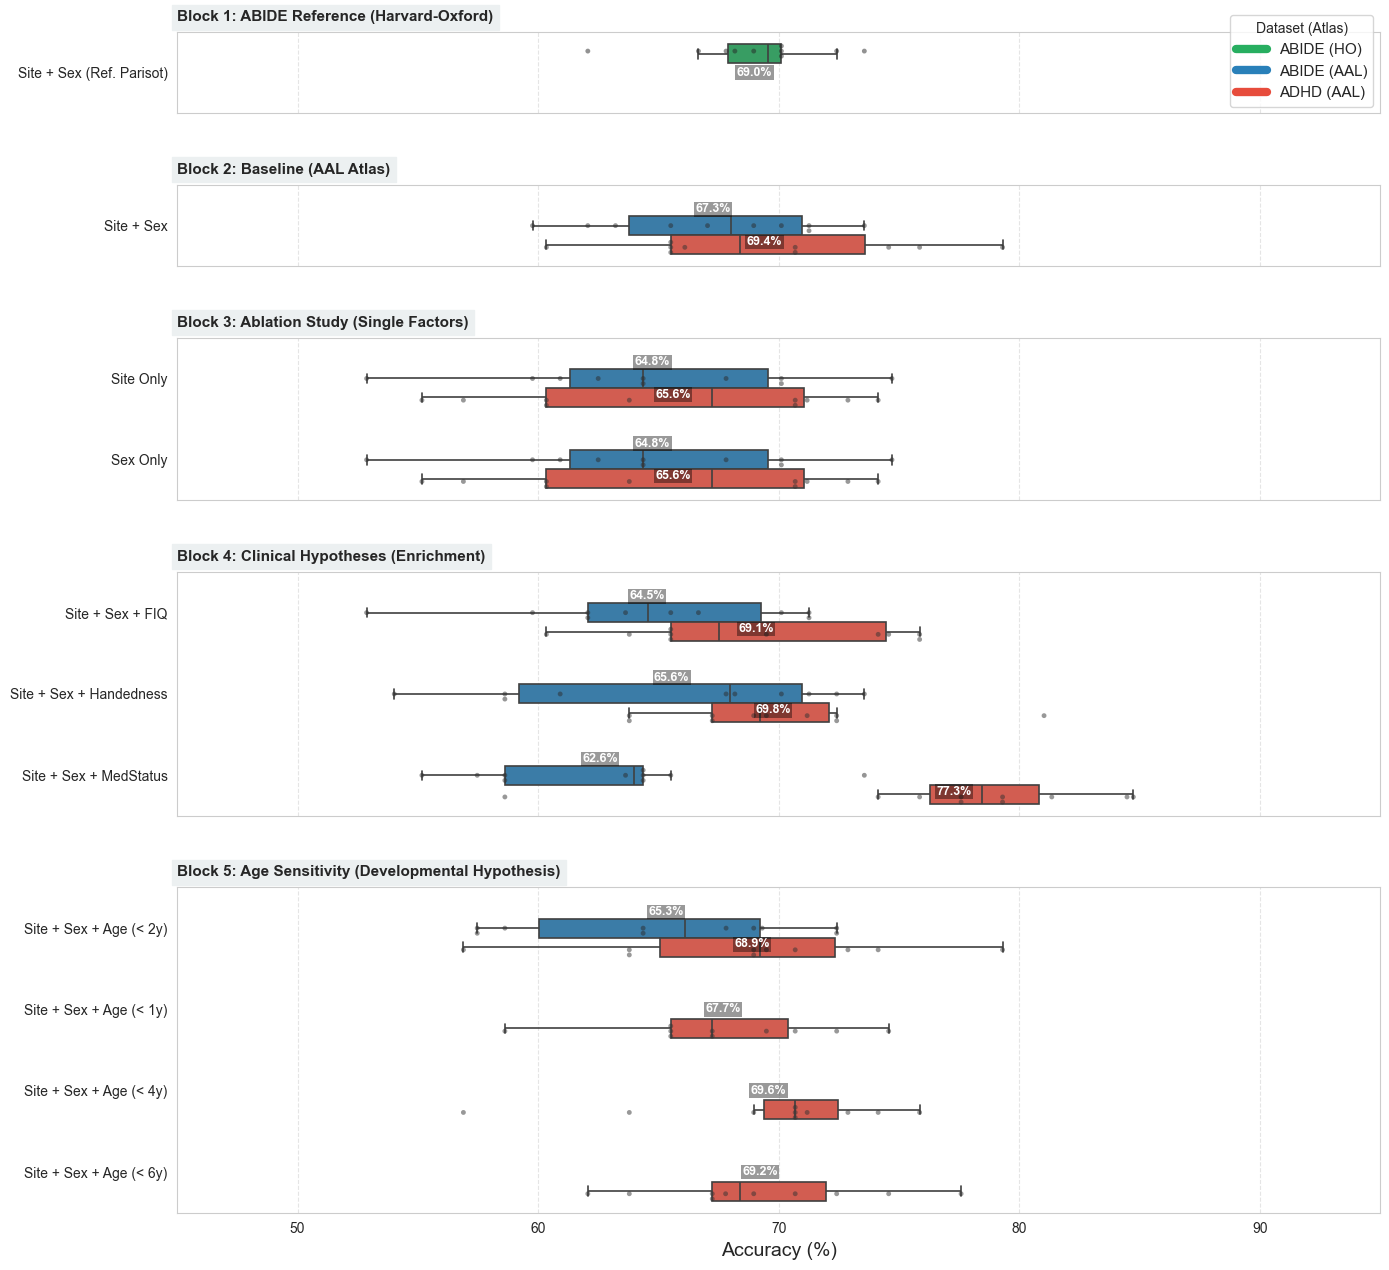

In [56]:
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D

# --- 1. CONFIGURATION ---
abide_dir = 'ABIDE_results'
adhd_dir = 'ADHD_results'

# BLOCKS CONFIGURATION (English Titles)
# Structure: Block_Title -> List of (Y_Axis_Label, Dataset_Tag, File_Path)

blocks_config = {
    "Block 1: ABIDE Reference (Harvard-Oxford)": [
        ('Site + Sex (Ref. Parisot)', 'ABIDE (HO)', os.path.join(abide_dir, 'ABIDE_classification.mat'))
    ],
    "Block 2: Baseline (AAL Atlas)": [
        ('Site + Sex', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_SEX_SITE.mat')),
        ('Site + Sex', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site.mat'))
    ],
    "Block 3: Ablation Study (Single Factors)": [
        ('Site Only', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_Site.mat')),
        ('Site Only', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Site.mat')),
        ('Sex Only', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_Sexe.mat')),
        ('Sex Only', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe.mat'))
    ],
    "Block 4: Clinical Hypotheses (Enrichment)": [
        ('Site + Sex + FIQ', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_FIQ_SEX_SITE.mat')),
        ('Site + Sex + FIQ', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_FIQ.mat')),
        ('Site + Sex + Handedness', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_Handedness_SEX_SITE.mat')),
        ('Site + Sex + Handedness', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Handedness.mat')),
        ('Site + Sex + MedStatus', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_MedStatus_SEX_SITE.mat')),
        ('Site + Sex + MedStatus', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_MedStatus.mat'))
    ],
    "Block 5: Age Sensitivity (Developmental Hypothesis)": [
        # Grouping ABIDE Standard Age with ADHD < 2y
        ('Site + Sex + Age (< 2y)', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_AGE_SEX_SITE.mat')),
        ('Site + Sex + Age (< 2y)', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-2ans.mat')),
        
        # ADHD Specific sensitivities
        ('Site + Sex + Age (< 1y)', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-1ans.mat')),
        ('Site + Sex + Age (< 4y)', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-4ans.mat')),
        ('Site + Sex + Age (< 6y)', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-6ans.mat'))
    ]
}

# --- 2. DATA EXTRACTION ---
dfs = {} 
unique_configs_per_block = [] 

print("Processing files...")
for block_name, items in blocks_config.items():
    block_data = []
    seen_labels = set()
    
    for label, dataset_tag, filepath in items:
        seen_labels.add(label)
        if not os.path.exists(filepath):
            print(f"⚠️ MISSING: {filepath}")
            continue
            
        try:
            mat = sio.loadmat(filepath)
            if 'acc' in mat:
                acc_counts = mat['acc'].flatten()
                if 'folds' in mat:
                    fold_sizes = mat['folds'].flatten()
                    accuracies = (acc_counts / fold_sizes) * 100
                else:
                    denom = 582/10 if 'ADHD' in dataset_tag else 871/10
                    accuracies = (acc_counts / denom) * 100

                for acc in accuracies:
                    block_data.append({
                        'Configuration': label,
                        'Dataset': dataset_tag,
                        'Accuracy (%)': acc
                    })
        except Exception as e:
            print(f"❌ Error reading {filepath}: {e}")
    
    dfs[block_name] = pd.DataFrame(block_data)
    unique_configs_per_block.append(len(seen_labels))

# --- 3. PLOTTING ---
sns.set_style("whitegrid")

# Calculate proportional heights
total_rows = sum(unique_configs_per_block)
height_ratios = unique_configs_per_block
total_height = total_rows * 0.8 + len(blocks_config) * 0.8

fig, axes = plt.subplots(len(blocks_config), 1, figsize=(14, total_height), 
                         gridspec_kw={'height_ratios': height_ratios}, sharex=True)

# Colors: Green (HO), Blue (ABIDE), Red (ADHD)
palette = {
    'ABIDE (HO)': '#27ae60',   
    'ABIDE (AAL)': '#2980b9',  
    'ADHD (AAL)': '#e74c3c'    
}

# Function to add mean text labels
def add_means(ax, df, order, hue_order):
    means = df.groupby(['Configuration', 'Dataset'])['Accuracy (%)'].mean()
    
    for i, config in enumerate(order):
        datasets_in_row = [d for d in hue_order if (config, d) in means.index]
        
        offsets = {}
        if len(datasets_in_row) == 1:
            offsets[datasets_in_row[0]] = 0
        elif len(datasets_in_row) == 2:
            offsets[datasets_in_row[0]] = -0.2
            offsets[datasets_in_row[1]] = 0.2
        elif len(datasets_in_row) == 3: 
            offsets[datasets_in_row[0]] = -0.26
            offsets[datasets_in_row[1]] = 0
            offsets[datasets_in_row[2]] = 0.26
            
        for ds in datasets_in_row:
            mean_val = means.loc[(config, ds)]
            y_pos = i + offsets[ds]
            
            # Display Mean Text
            ax.text(mean_val, y_pos, f"{mean_val:.1f}%", 
                    ha='center', va='center', 
                    color='white', fontweight='bold', fontsize=9,
                    bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', pad=1))

# Global Dataset Order for Legend
hue_order_global = ['ABIDE (HO)', 'ABIDE (AAL)', 'ADHD (AAL)']

# Loop to draw each block
for i, (block_name, df_block) in enumerate(dfs.items()):
    ax = axes[i]
    if df_block.empty: continue
    
    # Get local order of configurations
    local_order = []
    seen = set()
    for item in blocks_config[block_name]:
        if item[0] not in seen:
            local_order.append(item[0])
            seen.add(item[0])
    
    # Boxplot
    sns.boxplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df_block, 
                order=local_order, hue_order=hue_order_global, palette=palette, 
                dodge=True, width=0.7, linewidth=1.2, fliersize=0, ax=ax)
    
    # Swarmplot (Individual Points)
    sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df_block, 
                  order=local_order, hue_order=hue_order_global, dodge=True, 
                  size=3.5, color=".2", alpha=0.5, orient="h", ax=ax)
    
    # Add Means
    add_means(ax, df_block, local_order, hue_order_global)
    
    # Styling
    ax.set_title(block_name, loc='left', fontsize=11, fontweight='bold', pad=8, backgroundcolor='#ecf0f1')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.legend_.remove()
    ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Global Adjustments
axes[-1].set_xlabel('Accuracy (%)', fontsize=14)
plt.xlim(45, 95)

# Unique Legend
legend_elements = [
    Line2D([0], [0], color=palette['ABIDE (HO)'], lw=6, label='ABIDE (HO)'),
    Line2D([0], [0], color=palette['ABIDE (AAL)'], lw=6, label='ABIDE (AAL)'),
    Line2D([0], [0], color=palette['ADHD (AAL)'], lw=6, label='ADHD (AAL)')
]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.99, 0.99), 
           title='Dataset (Atlas)', fontsize=11, frameon=True)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4) # Space between blocks

# --- 4. SAVE ---
output_file = 'Results_Final_English.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"\n✅ Graph saved to: {output_file}")

plt.show()

Extraction des AUC...


/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/2468269455.py:159: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='AUC (%)', y='Configuration', hue='Dataset', data=df_block,
/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/2468269455.py:159: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='AUC (%)', y='Configuration', hue='Dataset', data=df_block,
/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/2468269455.py:159: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='AUC (%)', y='Configuration', hue='Dataset', data=df_block,
/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/24


✅ Graphique AUC sauvegardé : Resultats_Comparatifs_AUC.png


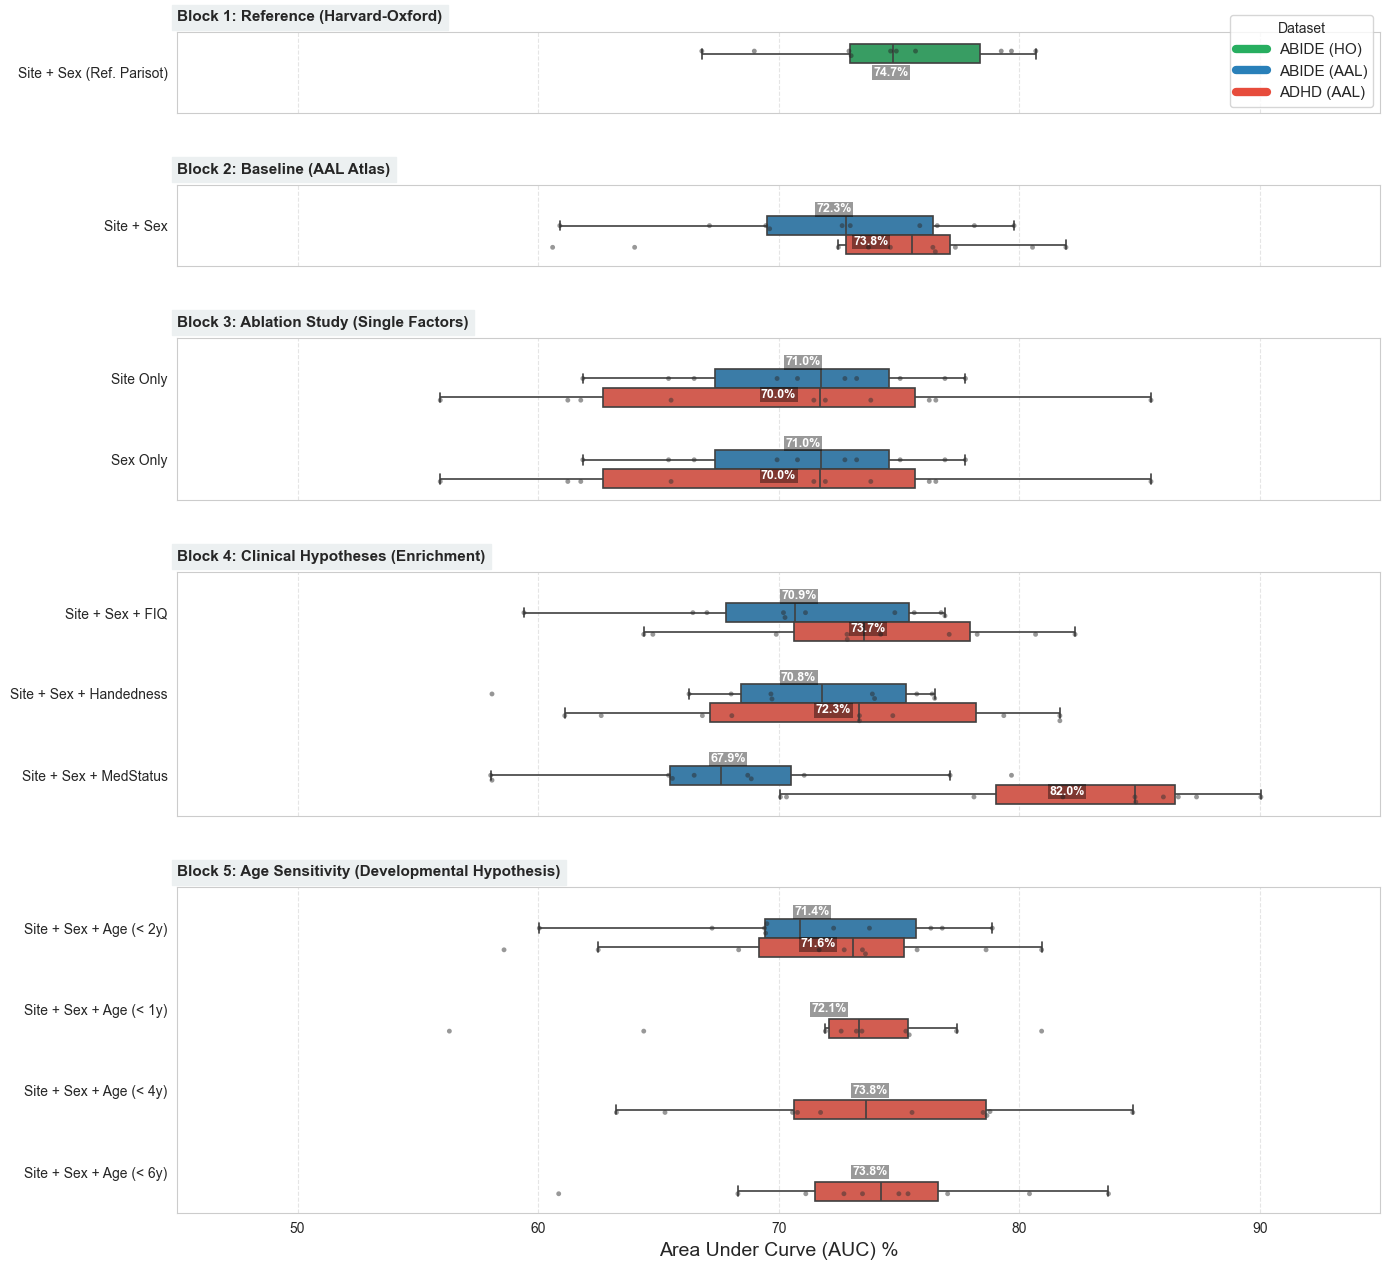

In [55]:
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D

# --- 1. CONFIGURATION ---
abide_dir = 'ABIDE_results'
adhd_dir = 'ADHD_results'

# CONFIGURATION DES BLOCS (Mêmes fichiers, mais on regardera l'AUC)
blocks_config = {
    "Block 1: Reference (Harvard-Oxford)": [
        ('Site + Sex (Ref. Parisot)', 'ABIDE (HO)', os.path.join(abide_dir, 'ABIDE_classification.mat'))
    ],
    "Block 2: Baseline (AAL Atlas)": [
        ('Site + Sex', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_SEX_SITE.mat')),
        ('Site + Sex', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site.mat'))
    ],
    "Block 3: Ablation Study (Single Factors)": [
        ('Site Only', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_Site.mat')),
        ('Site Only', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Site.mat')),
        ('Sex Only', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_Sexe.mat')),
        ('Sex Only', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe.mat'))
    ],
    "Block 4: Clinical Hypotheses (Enrichment)": [
        ('Site + Sex + FIQ', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_FIQ_SEX_SITE.mat')),
        ('Site + Sex + FIQ', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_FIQ.mat')),
        ('Site + Sex + Handedness', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_Handedness_SEX_SITE.mat')),
        ('Site + Sex + Handedness', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Handedness.mat')),
        ('Site + Sex + MedStatus', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_MedStatus_SEX_SITE.mat')),
        ('Site + Sex + MedStatus', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_MedStatus.mat'))
    ],
    "Block 5: Age Sensitivity (Developmental Hypothesis)": [
        # Groupement ABIDE Age avec ADHD < 2ans (Standard)
        ('Site + Sex + Age (< 2y)', 'ABIDE (AAL)', os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_AGE_SEX_SITE.mat')),
        ('Site + Sex + Age (< 2y)', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-2ans.mat')),
        
        # Variantes ADHD
        ('Site + Sex + Age (< 1y)', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-1ans.mat')),
        ('Site + Sex + Age (< 4y)', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-4ans.mat')),
        ('Site + Sex + Age (< 6y)', 'ADHD (AAL)', os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-6ans.mat'))
    ]
}

# --- 2. EXTRACTION DES DONNÉES (AUC) ---
dfs = {} 
unique_configs_per_block = [] 

print("Extraction des AUC...")
for block_name, items in blocks_config.items():
    block_data = []
    seen_labels = set()
    
    for label, dataset_tag, filepath in items:
        seen_labels.add(label)
        if not os.path.exists(filepath):
            print(f"⚠️ MANQUANT : {filepath}")
            # Placeholder pour garder la structure visuelle
            block_data.append({'Configuration': label, 'Dataset': dataset_tag, 'AUC (%)': np.nan})
            continue
            
        try:
            mat = sio.loadmat(filepath)
            
            # --- MODIFICATION CLÉ : Lecture de 'auc' ---
            if 'auc' in mat:
                auc_raw = mat['auc'].flatten()
                
                # L'AUC est déjà un ratio (0.0 à 1.0), on multiplie juste par 100
                auc_percent = auc_raw * 100
                
                for val in auc_percent:
                    block_data.append({
                        'Configuration': label,
                        'Dataset': dataset_tag,
                        'AUC (%)': val
                    })
            else:
                print(f"⚠️ Clé 'auc' manquante dans {filepath}")
                
        except Exception as e:
            print(f"❌ Erreur {filepath}: {e}")
    
    dfs[block_name] = pd.DataFrame(block_data)
    unique_configs_per_block.append(len(seen_labels))

# --- 3. CRÉATION DU GRAPHIQUE ---
sns.set_style("whitegrid")

# Hauteurs proportionnelles
total_rows = sum(unique_configs_per_block)
height_ratios = unique_configs_per_block
total_height = total_rows * 0.8 + len(blocks_config) * 0.8 

fig, axes = plt.subplots(len(blocks_config), 1, figsize=(14, total_height), 
                         gridspec_kw={'height_ratios': height_ratios}, sharex=True)

# Palette
palette = {
    'ABIDE (HO)': '#27ae60',   # Vert
    'ABIDE (AAL)': '#2980b9',  # Bleu
    'ADHD (AAL)': '#e74c3c'    # Rouge
}

# Fonction pour ajouter le texte de la moyenne
def add_means(ax, df, order, hue_order):
    if df.empty: return
    means = df.groupby(['Configuration', 'Dataset'])['AUC (%)'].mean()
    
    for i, config in enumerate(order):
        datasets_in_row = [d for d in hue_order if (config, d) in means.index]
        
        offsets = {}
        if len(datasets_in_row) == 1:
            offsets[datasets_in_row[0]] = 0
        elif len(datasets_in_row) == 2:
            offsets[datasets_in_row[0]] = -0.2
            offsets[datasets_in_row[1]] = 0.2
        elif len(datasets_in_row) == 3:
            offsets[datasets_in_row[0]] = -0.26
            offsets[datasets_in_row[1]] = 0
            offsets[datasets_in_row[2]] = 0.26
            
        for ds in datasets_in_row:
            mean_val = means.loc[(config, ds)]
            y_pos = i + offsets[ds]
            
            # Affichage texte
            ax.text(mean_val, y_pos, f"{mean_val:.1f}%", 
                    ha='center', va='center', 
                    color='white', fontweight='bold', fontsize=9,
                    bbox=dict(facecolor='black', alpha=0.4, edgecolor='none', pad=1))

# Ordre global pour le hue (Couleurs)
hue_order_global = ['ABIDE (HO)', 'ABIDE (AAL)', 'ADHD (AAL)']

# Boucle de tracé
for i, (block_name, df_block) in enumerate(dfs.items()):
    ax = axes[i]
    if df_block.empty: continue
    
    # Ordre local
    local_order = []
    seen = set()
    for item in blocks_config[block_name]:
        if item[0] not in seen:
            local_order.append(item[0])
            seen.add(item[0])
    
    # Boxplot
    sns.boxplot(x='AUC (%)', y='Configuration', hue='Dataset', data=df_block, 
                order=local_order, hue_order=hue_order_global, palette=palette, 
                dodge=True, width=0.7, linewidth=1.2, fliersize=0, ax=ax)
    
    # Swarmplot
    sns.swarmplot(x='AUC (%)', y='Configuration', hue='Dataset', data=df_block, 
                  order=local_order, hue_order=hue_order_global, dodge=True, 
                  size=3.5, color=".2", alpha=0.5, orient="h", ax=ax)
    
    # Moyennes
    add_means(ax, df_block, local_order, hue_order_global)
    
    # Esthétique
    ax.set_title(block_name, loc='left', fontsize=11, fontweight='bold', pad=8, backgroundcolor='#ecf0f1')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.legend_.remove()
    ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Finalisation
axes[-1].set_xlabel('Area Under Curve (AUC) %', fontsize=14)
plt.xlim(45, 95) # Zoom adapté pour l'AUC

# Légende
legend_elements = [
    Line2D([0], [0], color=palette['ABIDE (HO)'], lw=6, label='ABIDE (HO)'),
    Line2D([0], [0], color=palette['ABIDE (AAL)'], lw=6, label='ABIDE (AAL)'),
    Line2D([0], [0], color=palette['ADHD (AAL)'], lw=6, label='ADHD (AAL)')
]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.99, 0.99), 
           title='Dataset', fontsize=11, frameon=True)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

# Sauvegarde
output_file = 'Resultats_Comparatifs_AUC.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"\n✅ Graphique AUC sauvegardé : {output_file}")

plt.show()

Chargement des données...


/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/2821817641.py:122: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='Score', y='Configuration', hue='Dataset', data=df,


✅ Graphique Accuracy sauvegardé : Global_Result_Accuracy.png


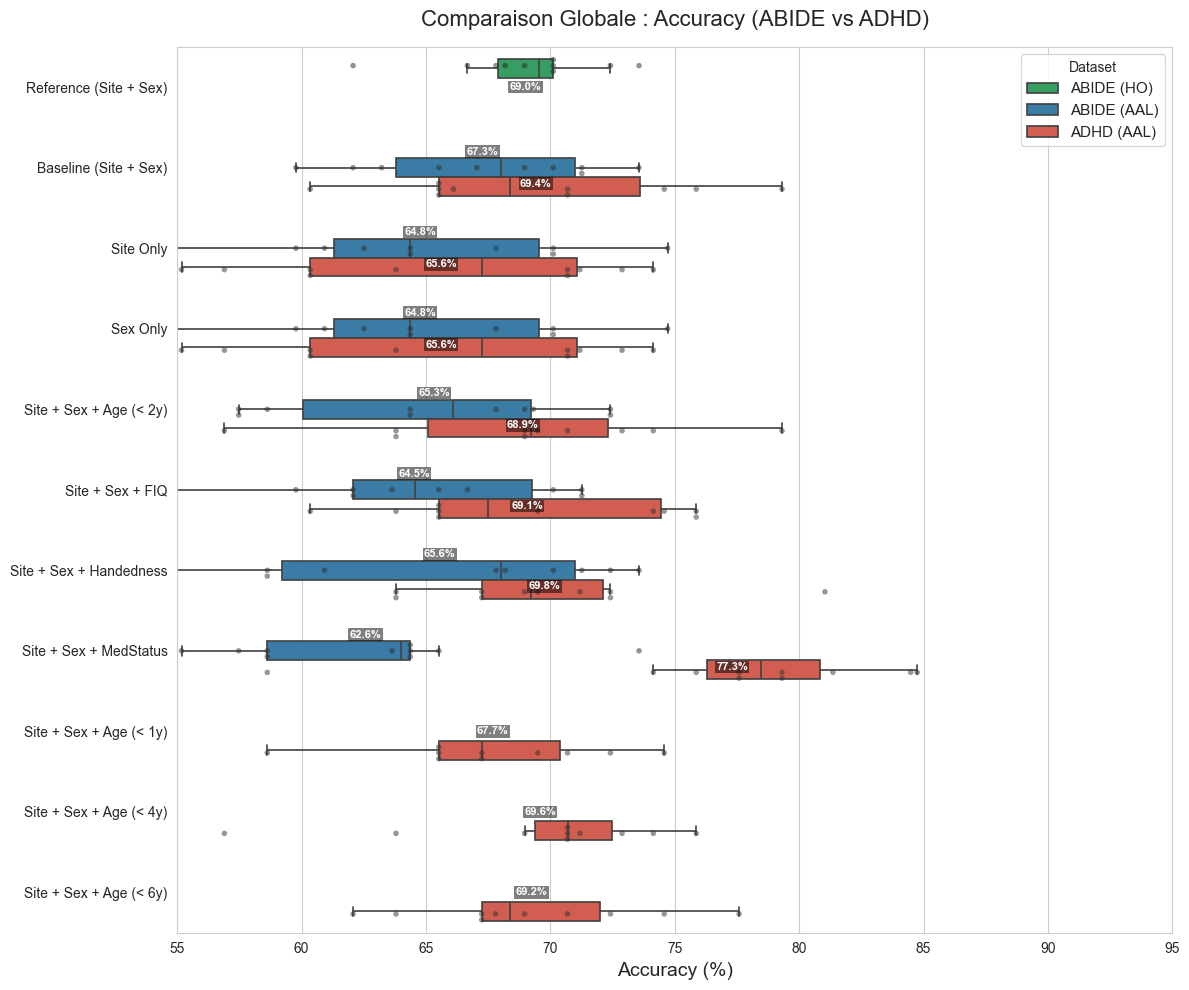

/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/2821817641.py:122: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='Score', y='Configuration', hue='Dataset', data=df,


✅ Graphique AUC sauvegardé : Global_Result_AUC.png


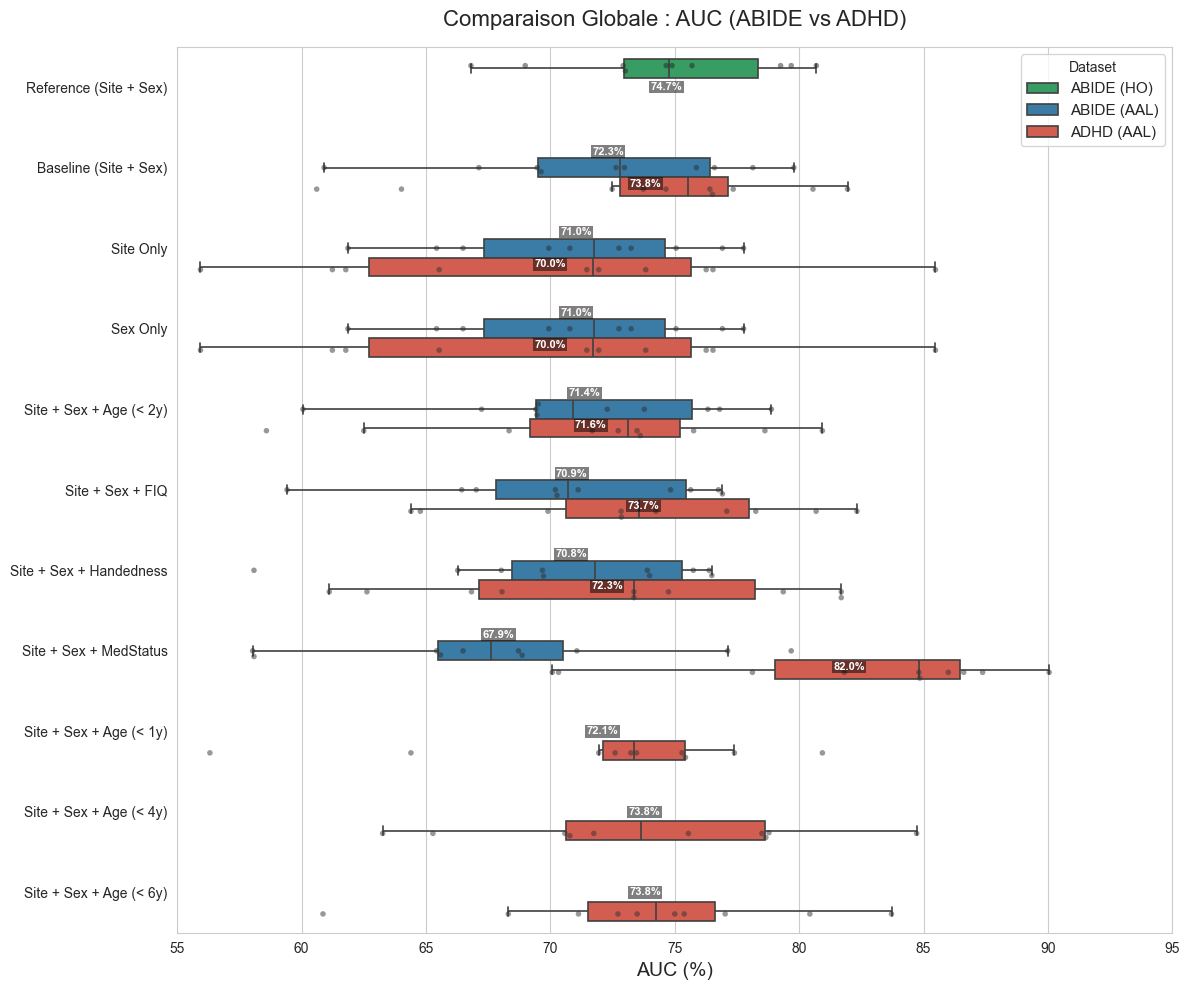

In [61]:
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D

# --- 1. CONFIGURATION ---
abide_dir = 'ABIDE_results'
adhd_dir = 'ADHD_results'

# MAPPING DES FICHIERS
# Structure : (Label_Y, Dataset_Tag) -> Chemin_Fichier
files_map = {
    # --- REFERENCE ---
    ('Reference (Site + Sex)', 'ABIDE (HO)'): os.path.join(abide_dir, 'ABIDE_classification.mat'),

    # --- BASELINE ---
    ('Baseline (Site + Sex)', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_SEX_SITE.mat'),
    ('Baseline (Site + Sex)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site.mat'),

    # --- ABLATION ---
    ('Site Only', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_Site.mat'),
    ('Site Only', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Site.mat'),
    ('Sex Only', 'ABIDE (AAL)'):  os.path.join(abide_dir, 'ABIDE_classification_Sexe.mat'),
    ('Sex Only', 'ADHD (AAL)'):   os.path.join(adhd_dir, 'ADHD_classification_Sexe.mat'),

    # --- HYPOTHESES ---
    ('Site + Sex + FIQ', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_FIQ_SEX_SITE.mat'),
    ('Site + Sex + FIQ', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_FIQ.mat'),
    
    ('Site + Sex + Handedness', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_Handedness_SEX_SITE.mat'),
    ('Site + Sex + Handedness', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Handedness.mat'),
    
    ('Site + Sex + MedStatus', 'ABIDE (AAL)'):  os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_MedStatus_SEX_SITE.mat'),
    ('Site + Sex + MedStatus', 'ADHD (AAL)'):   os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_MedStatus.mat'),

    # --- AGE SENSITIVITY ---
    # On regroupe ABIDE standard avec ADHD < 2y
    ('Site + Sex + Age (< 2y)', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_AGE_SEX_SITE.mat'),
    ('Site + Sex + Age (< 2y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-2ans.mat'),
    
    ('Site + Sex + Age (< 1y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-1ans.mat'),
    ('Site + Sex + Age (< 4y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-4ans.mat'),
    ('Site + Sex + Age (< 6y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-6ans.mat'),
}

# ORDRE D'AFFICHAGE (De haut en bas)
plot_order = [
    'Reference (Site + Sex)',
    'Baseline (Site + Sex)',
    'Site Only',
    'Sex Only',
    'Site + Sex + Age (< 2y)',
    'Site + Sex + FIQ',
    'Site + Sex + Handedness',
    'Site + Sex + MedStatus',
    'Site + Sex + Age (< 1y)',
    'Site + Sex + Age (< 4y)',
    'Site + Sex + Age (< 6y)'
]

# --- 2. EXTRACTION DES DONNÉES ---
data_acc = []
data_auc = []

print("Chargement des données...")
for (label, dataset_tag), filepath in files_map.items():
    if not os.path.exists(filepath):
        print(f"⚠️ MANQUANT : {filepath}")
        continue
        
    try:
        mat = sio.loadmat(filepath)
        
        # 1. ACCURACY
        if 'acc' in mat:
            acc_vals = mat['acc'].flatten()
            if 'folds' in mat:
                fold_sizes = mat['folds'].flatten()
                acc_percent = (acc_vals / fold_sizes) * 100
            else:
                denom = 582/10 if 'ADHD' in dataset_tag else 871/10
                acc_percent = (acc_vals / denom) * 100
            
            for v in acc_percent:
                data_acc.append({'Configuration': label, 'Dataset': dataset_tag, 'Score': v})

        # 2. AUC
        if 'auc' in mat:
            auc_vals = mat['auc'].flatten()
            # AUC est déjà en ratio (0-1), on met en %
            auc_percent = auc_vals * 100
            
            for v in auc_percent:
                data_auc.append({'Configuration': label, 'Dataset': dataset_tag, 'Score': v})
                
    except Exception as e:
        print(f"❌ Erreur {filepath}: {e}")

df_acc = pd.DataFrame(data_acc)
df_auc = pd.DataFrame(data_auc)

# --- 3. FONCTION DE PLOT GÉNÉRIQUE ---
def plot_global(df, metric_name, filename, x_limit):
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 10)) # Hauteur ajustée pour tout contenir

    palette = {
        'ABIDE (HO)': '#27ae60',   # Vert
        'ABIDE (AAL)': '#2980b9',  # Bleu
        'ADHD (AAL)': '#e74c3c'    # Rouge
    }

    # Boxplot
    ax = sns.boxplot(x='Score', y='Configuration', hue='Dataset', data=df, 
                     order=plot_order, palette=palette, 
                     dodge=True, width=0.7, linewidth=1.2, fliersize=0)

    # Swarmplot
    sns.swarmplot(x='Score', y='Configuration', hue='Dataset', data=df, 
                  order=plot_order, dodge=True, size=4, color=".2", alpha=0.5, orient="h")

    # Moyennes (Texte)
    means = df.groupby(['Configuration', 'Dataset'])['Score'].mean()
    # Ordre des couleurs dans la légende
    hue_order = ['ABIDE (HO)', 'ABIDE (AAL)', 'ADHD (AAL)']
    
    for i, config in enumerate(plot_order):
        datasets_in_row = [d for d in hue_order if (config, d) in means.index]
        
        # Calcul des décalages pour centrer le texte sur la boîte
        offsets = {}
        if len(datasets_in_row) == 1: offsets = {datasets_in_row[0]: 0}
        elif len(datasets_in_row) == 2: offsets = {datasets_in_row[0]: -0.2, datasets_in_row[1]: 0.2}
        elif len(datasets_in_row) == 3: offsets = {datasets_in_row[0]: -0.26, datasets_in_row[1]: 0, datasets_in_row[2]: 0.26}
            
        for ds in datasets_in_row:
            val = means.loc[(config, ds)]
            ax.text(val, i + offsets[ds], f"{val:.1f}%", 
                    ha='center', va='center', color='white', fontweight='bold', fontsize=8,
                    bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', pad=1))

    # Esthétique
    plt.title(f'Comparaison Globale : {metric_name} (ABIDE vs ADHD)', fontsize=16, pad=15)
    plt.xlabel(f'{metric_name} (%)', fontsize=14)
    plt.ylabel('')
    plt.xlim(x_limit)
    
    # Légende unique
    handles, labels = ax.get_legend_handles_labels()
    unique_legend = {}
    for h, l in zip(handles, labels):
        if l not in unique_legend: unique_legend[l] = h
    plt.legend(unique_legend.values(), unique_legend.keys(), title='Dataset', fontsize=11, loc='upper right')

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    print(f"✅ Graphique {metric_name} sauvegardé : {filename}")
    plt.show()

# --- 4. GÉNÉRATION DES 2 GRAPHES ---
plot_global(df_acc, 'Accuracy', 'Global_Result_Accuracy.png', x_limit=(55, 95))
plot_global(df_auc, 'AUC', 'Global_Result_AUC.png', x_limit=(55, 95))

Chargement des données...


/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/175943474.py:120: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='Score', y='Configuration', hue='Dataset', data=df,


✅ Graphique Accuracy sauvegardé : Global_Result_Accuracy_NoMed.png


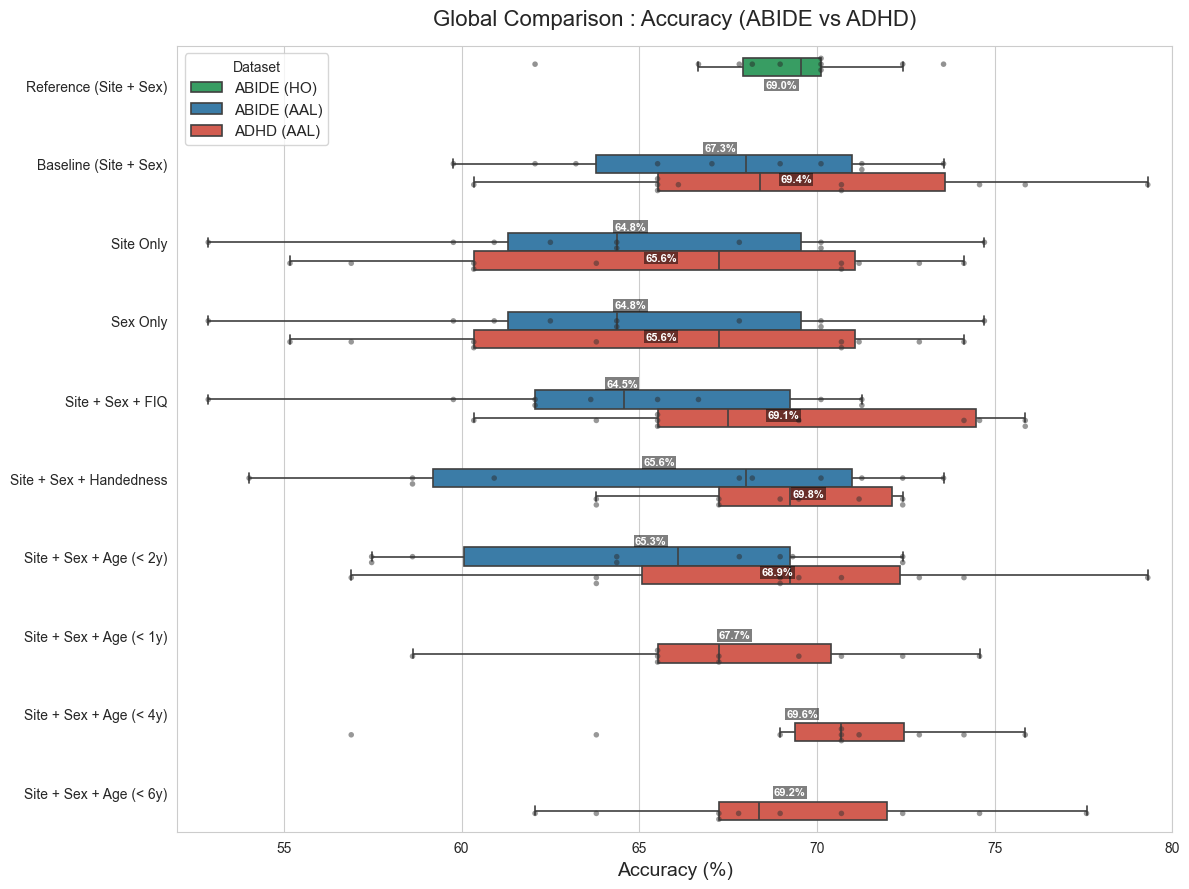

/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/175943474.py:120: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='Score', y='Configuration', hue='Dataset', data=df,


✅ Graphique AUC sauvegardé : Global_Result_AUC_NoMed.png


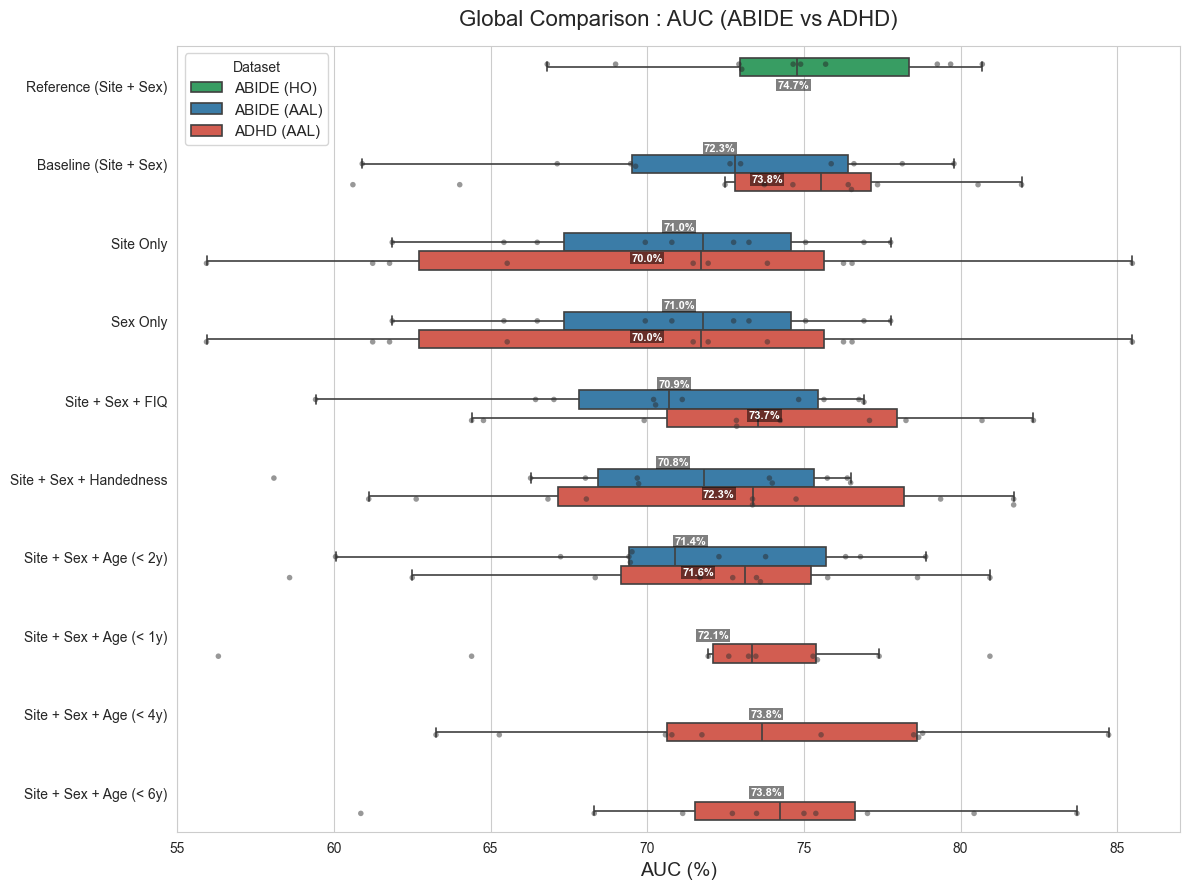

In [68]:
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D

# --- 1. CONFIGURATION ---
abide_dir = 'ABIDE_results'
adhd_dir = 'ADHD_results'

# MAPPING DES FICHIERS (Sans MedStatus)
files_map = {
    # --- REFERENCE ---
    ('Reference (Site + Sex)', 'ABIDE (HO)'): os.path.join(abide_dir, 'ABIDE_classification.mat'),

    # --- BASELINE ---
    ('Baseline (Site + Sex)', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_SEX_SITE.mat'),
    ('Baseline (Site + Sex)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site.mat'),

    # --- ABLATION ---
    ('Site Only', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_Site.mat'),
    ('Site Only', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Site.mat'),
    ('Sex Only', 'ABIDE (AAL)'):  os.path.join(abide_dir, 'ABIDE_classification_Sexe.mat'),
    ('Sex Only', 'ADHD (AAL)'):   os.path.join(adhd_dir, 'ADHD_classification_Sexe.mat'),

    # --- HYPOTHESES ---
    ('Site + Sex + FIQ', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_FIQ_SEX_SITE.mat'),
    ('Site + Sex + FIQ', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_FIQ.mat'),
    
    ('Site + Sex + Handedness', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_Handedness_SEX_SITE.mat'),
    ('Site + Sex + Handedness', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Handedness.mat'),
    
    # SUPPRIMÉ : Site + Sex + MedStatus

    # --- AGE SENSITIVITY ---
    # ABIDE standard avec ADHD < 2y
    ('Site + Sex + Age (< 2y)', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_AGE_SEX_SITE.mat'),
    ('Site + Sex + Age (< 2y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-2ans.mat'),
    
    ('Site + Sex + Age (< 1y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-1ans.mat'),
    ('Site + Sex + Age (< 4y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-4ans.mat'),
    ('Site + Sex + Age (< 6y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-6ans.mat'),
}

# ORDRE D'AFFICHAGE (Mis à jour sans MedStatus)
plot_order = [
    'Reference (Site + Sex)',
    'Baseline (Site + Sex)',
    'Site Only',
    'Sex Only',
    'Site + Sex + FIQ',
    'Site + Sex + Handedness',
    # SUPPRIMÉ : 'Site + Sex + MedStatus',
    'Site + Sex + Age (< 2y)',
    'Site + Sex + Age (< 1y)',
    'Site + Sex + Age (< 4y)',
    'Site + Sex + Age (< 6y)'
]

# --- 2. EXTRACTION DES DONNÉES ---
data_acc = []
data_auc = []

print("Chargement des données...")
for (label, dataset_tag), filepath in files_map.items():
    if not os.path.exists(filepath):
        print(f"⚠️ MANQUANT : {filepath}")
        continue
        
    try:
        mat = sio.loadmat(filepath)
        
        # 1. ACCURACY
        if 'acc' in mat:
            acc_vals = mat['acc'].flatten()
            if 'folds' in mat:
                fold_sizes = mat['folds'].flatten()
                acc_percent = (acc_vals / fold_sizes) * 100
            else:
                denom = 582/10 if 'ADHD' in dataset_tag else 871/10
                acc_percent = (acc_vals / denom) * 100
            
            for v in acc_percent:
                data_acc.append({'Configuration': label, 'Dataset': dataset_tag, 'Score': v})

        # 2. AUC
        if 'auc' in mat:
            auc_vals = mat['auc'].flatten()
            auc_percent = auc_vals * 100
            
            for v in auc_percent:
                data_auc.append({'Configuration': label, 'Dataset': dataset_tag, 'Score': v})
                
    except Exception as e:
        print(f"❌ Erreur {filepath}: {e}")

df_acc = pd.DataFrame(data_acc)
df_auc = pd.DataFrame(data_auc)

# --- 3. FONCTION DE PLOT GÉNÉRIQUE ---
def plot_global(df, metric_name, filename, x_limit):
    sns.set_style("whitegrid")
    # Hauteur légèrement réduite car moins de lignes
    plt.figure(figsize=(12, 9)) 

    palette = {
        'ABIDE (HO)': '#27ae60',   # Vert
        'ABIDE (AAL)': '#2980b9',  # Bleu
        'ADHD (AAL)': '#e74c3c'    # Rouge
    }

    # Boxplot
    ax = sns.boxplot(x='Score', y='Configuration', hue='Dataset', data=df, 
                     order=plot_order, palette=palette, 
                     dodge=True, width=0.7, linewidth=1.2, fliersize=0)

    # Swarmplot
    sns.swarmplot(x='Score', y='Configuration', hue='Dataset', data=df, 
                  order=plot_order, dodge=True, size=4, color=".2", alpha=0.5, orient="h")

    # Moyennes (Texte)
    means = df.groupby(['Configuration', 'Dataset'])['Score'].mean()
    hue_order = ['ABIDE (HO)', 'ABIDE (AAL)', 'ADHD (AAL)']
    
    for i, config in enumerate(plot_order):
        datasets_in_row = [d for d in hue_order if (config, d) in means.index]
        
        offsets = {}
        if len(datasets_in_row) == 1: offsets = {datasets_in_row[0]: 0}
        elif len(datasets_in_row) == 2: offsets = {datasets_in_row[0]: -0.2, datasets_in_row[1]: 0.2}
        elif len(datasets_in_row) == 3: offsets = {datasets_in_row[0]: -0.26, datasets_in_row[1]: 0, datasets_in_row[2]: 0.26}
            
        for ds in datasets_in_row:
            val = means.loc[(config, ds)]
            ax.text(val, i + offsets[ds], f"{val:.1f}%", 
                    ha='center', va='center', color='white', fontweight='bold', fontsize=8,
                    bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', pad=1))

    # Esthétique
    plt.title(f'Global Comparison : {metric_name} (ABIDE vs ADHD)', fontsize=16, pad=15)
    plt.xlabel(f'{metric_name} (%)', fontsize=14)
    plt.ylabel('')
    plt.xlim(x_limit)
    
    # Légende unique
    handles, labels = ax.get_legend_handles_labels()
    unique_legend = {}
    for h, l in zip(handles, labels):
        if l not in unique_legend: unique_legend[l] = h
    plt.legend(unique_legend.values(), unique_legend.keys(), title='Dataset', fontsize=11, loc='upper left')

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    print(f"✅ Graphique {metric_name} sauvegardé : {filename}")
    plt.show()

# --- 4. GÉNÉRATION DES 2 GRAPHES ---
plot_global(df_acc, 'Accuracy', 'Global_Result_Accuracy_NoMed.png', x_limit=(52, 80))
plot_global(df_auc, 'AUC', 'Global_Result_AUC_NoMed.png', x_limit=(55, 87))

Chargement des données...


/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/1635594643.py:129: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.25'` for the same effect.

  sns.swarmplot(


✅ Graphique Accuracy sauvegardé : Global_Result_Accuracy_NoMed.png


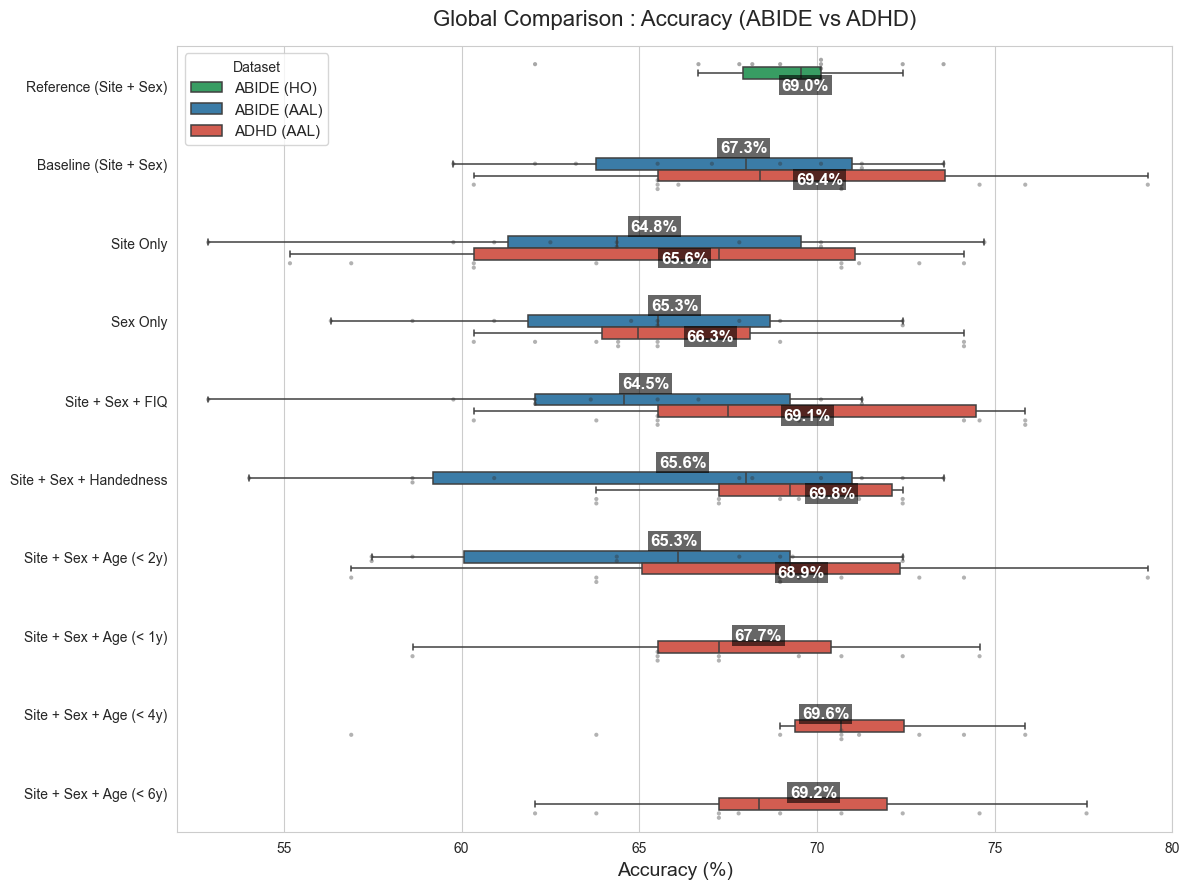

/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/1635594643.py:129: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.25'` for the same effect.

  sns.swarmplot(


✅ Graphique AUC sauvegardé : Global_Result_AUC_NoMed.png


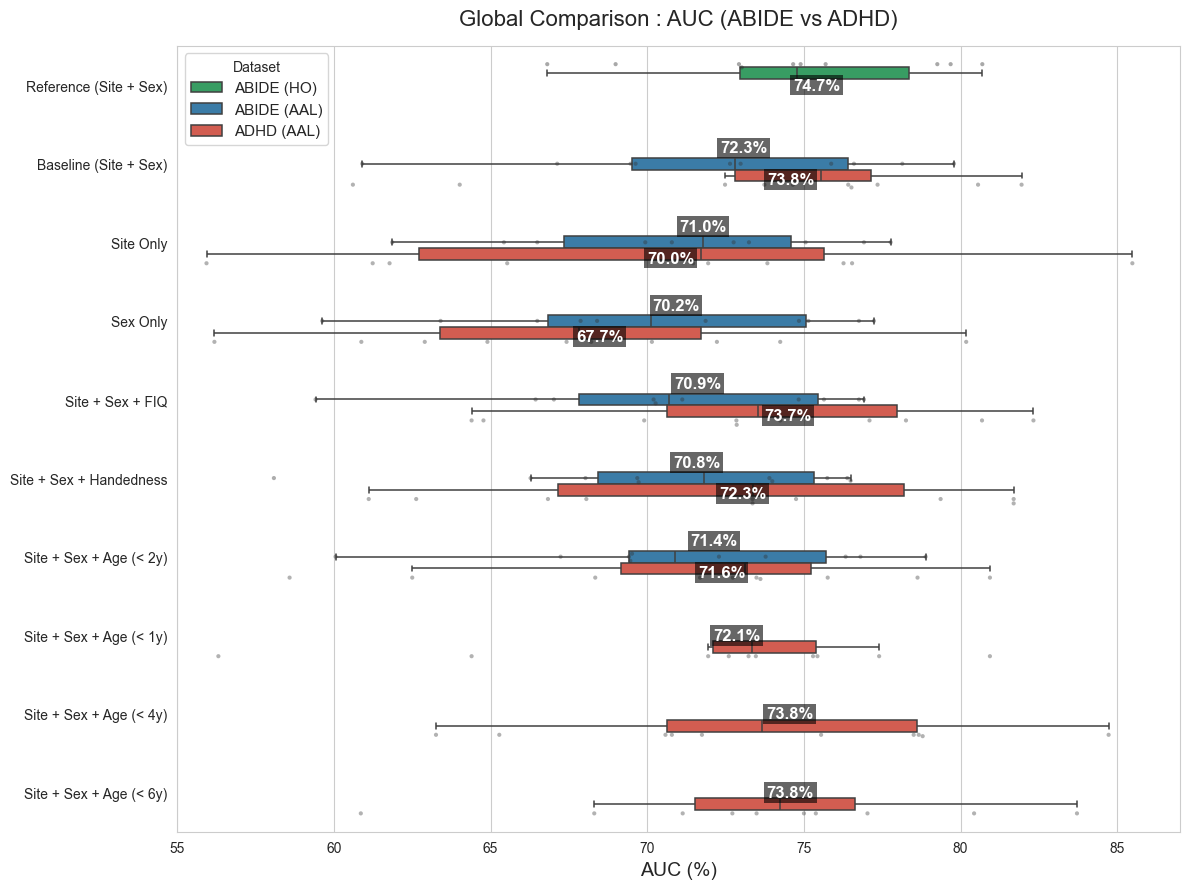

In [78]:
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D

# --- 1. CONFIGURATION ---
abide_dir = 'ABIDE_results'
adhd_dir = 'ADHD_results'

# MAPPING DES FICHIERS (Sans MedStatus)
files_map = {
    # --- REFERENCE ---
    ('Reference (Site + Sex)', 'ABIDE (HO)'): os.path.join(abide_dir, 'ABIDE_classification.mat'),

    # --- BASELINE ---
    ('Baseline (Site + Sex)', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_SEX_SITE.mat'),
    ('Baseline (Site + Sex)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site.mat'),

    # --- ABLATION ---
    ('Site Only', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_siteeabide.mat'),
    ('Site Only', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_siteeadhd.mat'),
    ('Sex Only', 'ABIDE (AAL)'):  os.path.join(abide_dir, 'ABIDE_classification_sexxabide.mat'),
    ('Sex Only', 'ADHD (AAL)'):   os.path.join(adhd_dir, 'ADHD_classification_sexxadhd.mat'),

    # --- HYPOTHESES ---
    ('Site + Sex + FIQ', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_FIQ_SEX_SITE.mat'),
    ('Site + Sex + FIQ', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_FIQ.mat'),
    
    ('Site + Sex + Handedness', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_Handedness_SEX_SITE.mat'),
    ('Site + Sex + Handedness', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Handedness.mat'),
    
    # SUPPRIMÉ : Site + Sex + MedStatus

    # --- AGE SENSITIVITY ---
    # ABIDE standard avec ADHD < 2y
    ('Site + Sex + Age (< 2y)', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_AGE_SEX_SITE.mat'),
    ('Site + Sex + Age (< 2y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-2ans.mat'),
    
    ('Site + Sex + Age (< 1y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-1ans.mat'),
    ('Site + Sex + Age (< 4y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-4ans.mat'),
    ('Site + Sex + Age (< 6y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-6ans.mat'),
}

# ORDRE D'AFFICHAGE (Mis à jour sans MedStatus)
plot_order = [
    'Reference (Site + Sex)',
    'Baseline (Site + Sex)',
    'Site Only',
    'Sex Only',
    'Site + Sex + FIQ',
    'Site + Sex + Handedness',
    # SUPPRIMÉ : 'Site + Sex + MedStatus',
    'Site + Sex + Age (< 2y)',
    'Site + Sex + Age (< 1y)',
    'Site + Sex + Age (< 4y)',
    'Site + Sex + Age (< 6y)'
]

# --- 2. EXTRACTION DES DONNÉES ---
data_acc = []
data_auc = []

print("Chargement des données...")
for (label, dataset_tag), filepath in files_map.items():
    if not os.path.exists(filepath):
        print(f"⚠️ MANQUANT : {filepath}")
        continue
        
    try:
        mat = sio.loadmat(filepath)
        
        # 1. ACCURACY
        if 'acc' in mat:
            acc_vals = mat['acc'].flatten()
            if 'folds' in mat:
                fold_sizes = mat['folds'].flatten()
                acc_percent = (acc_vals / fold_sizes) * 100
            else:
                denom = 582/10 if 'ADHD' in dataset_tag else 871/10
                acc_percent = (acc_vals / denom) * 100
            
            for v in acc_percent:
                data_acc.append({'Configuration': label, 'Dataset': dataset_tag, 'Score': v})

        # 2. AUC
        if 'auc' in mat:
            auc_vals = mat['auc'].flatten()
            auc_percent = auc_vals * 100
            
            for v in auc_percent:
                data_auc.append({'Configuration': label, 'Dataset': dataset_tag, 'Score': v})
                
    except Exception as e:
        print(f"❌ Erreur {filepath}: {e}")

df_acc = pd.DataFrame(data_acc)
df_auc = pd.DataFrame(data_auc)

# --- 3. FONCTION DE PLOT GÉNÉRIQUE ---
def plot_global(df, metric_name, filename, x_limit):
    sns.set_style("whitegrid")
    # Hauteur légèrement réduite car moins de lignes
    plt.figure(figsize=(12, 9)) 

    palette = {
        'ABIDE (HO)': '#27ae60',   # Vert
        'ABIDE (AAL)': '#2980b9',  # Bleu
        'ADHD (AAL)': '#e74c3c'    # Rouge
    }

    ### Boxplot
    ##ax = sns.boxplot(x='Score', y='Configuration', hue='Dataset', data=df, 
    ##                 order=plot_order, palette=palette, 
    ##                 dodge=True, width=0.7, linewidth=1.2, fliersize=0)
##
    ### Swarmplot
    ##sns.swarmplot(x='Score', y='Configuration', hue='Dataset', data=df, 
    ##              order=plot_order, dodge=True, size=4, color=".2", alpha=0.5, orient="h")

    ax = sns.boxplot(
    x='Score', y='Configuration', hue='Dataset', data=df,
    order=plot_order, palette=palette,
    dodge=True, width=0.45, linewidth=1.1, fliersize=0
    )
    
    sns.swarmplot(
        x='Score', y='Configuration', hue='Dataset', data=df,
        order=plot_order, dodge=True, size=3, color=".25", alpha=0.4
    )


    # Moyennes (Texte)
    means = df.groupby(['Configuration', 'Dataset'])['Score'].mean()
    hue_order = ['ABIDE (HO)', 'ABIDE (AAL)', 'ADHD (AAL)']
    
    for i, config in enumerate(plot_order):
        datasets_in_row = [d for d in hue_order if (config, d) in means.index]
        
        offsets = {}
        if len(datasets_in_row) == 1: offsets = {datasets_in_row[0]: 0}
        elif len(datasets_in_row) == 2: offsets = {datasets_in_row[0]: -0.2, datasets_in_row[1]: 0.2}
        elif len(datasets_in_row) == 3: offsets = {datasets_in_row[0]: -0.26, datasets_in_row[1]: 0, datasets_in_row[2]: 0.26}
            
        #for ds in datasets_in_row:
        #    val = means.loc[(config, ds)]
        #    ax.text(val, i + offsets[ds], f"{val:.1f}%", 
        #            ha='center', va='center', color='white', fontweight='bold', fontsize=8,
        #            bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', pad=1))
        for ds in datasets_in_row:
            val = means.loc[(config, ds)]
            
            # --- MODIFICATIONS ICI ---
            # 1. On décale le texte vers la droite sur l'axe X (val + 0.8)
            # 2. On change l'alignement (ha='left')
            # 3. On augmente la taille de la police (fontsize=10)
            
            ax.text(val, i + offsets[ds], f"{val:.1f}%", 
                    ha='left',      # Aligné à gauche (le texte part vers la droite)
                    va='center', 
                    color='white', 
                    fontweight='bold', 
                    fontsize=12,    # Taille augmentée (était 8)
                    bbox=dict(facecolor='black', alpha=0.6, edgecolor='none', pad=2))

    # Esthétique
    plt.title(f'Global Comparison : {metric_name} (ABIDE vs ADHD)', fontsize=16, pad=15)
    plt.xlabel(f'{metric_name} (%)', fontsize=14)
    plt.ylabel('')
    plt.xlim(x_limit)
    
    # Légende unique
    handles, labels = ax.get_legend_handles_labels()
    unique_legend = {}
    for h, l in zip(handles, labels):
        if l not in unique_legend: unique_legend[l] = h
    plt.legend(unique_legend.values(), unique_legend.keys(), title='Dataset', fontsize=11, loc='upper left')

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    print(f"✅ Graphique {metric_name} sauvegardé : {filename}")
    plt.show()

# --- 4. GÉNÉRATION DES 2 GRAPHES ---
plot_global(df_acc, 'Accuracy', 'Global_Result_Accuracy_NoMed.png', x_limit=(52, 80))
plot_global(df_auc, 'AUC', 'Global_Result_AUC_NoMed.png', x_limit=(55, 87))

Chargement des données...


/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/2155093274.py:150: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.25'` for the same effect.

  sns.swarmplot(


✅ Graphique Accuracy sauvegardé : Global_Result_Accuracy_Final.png


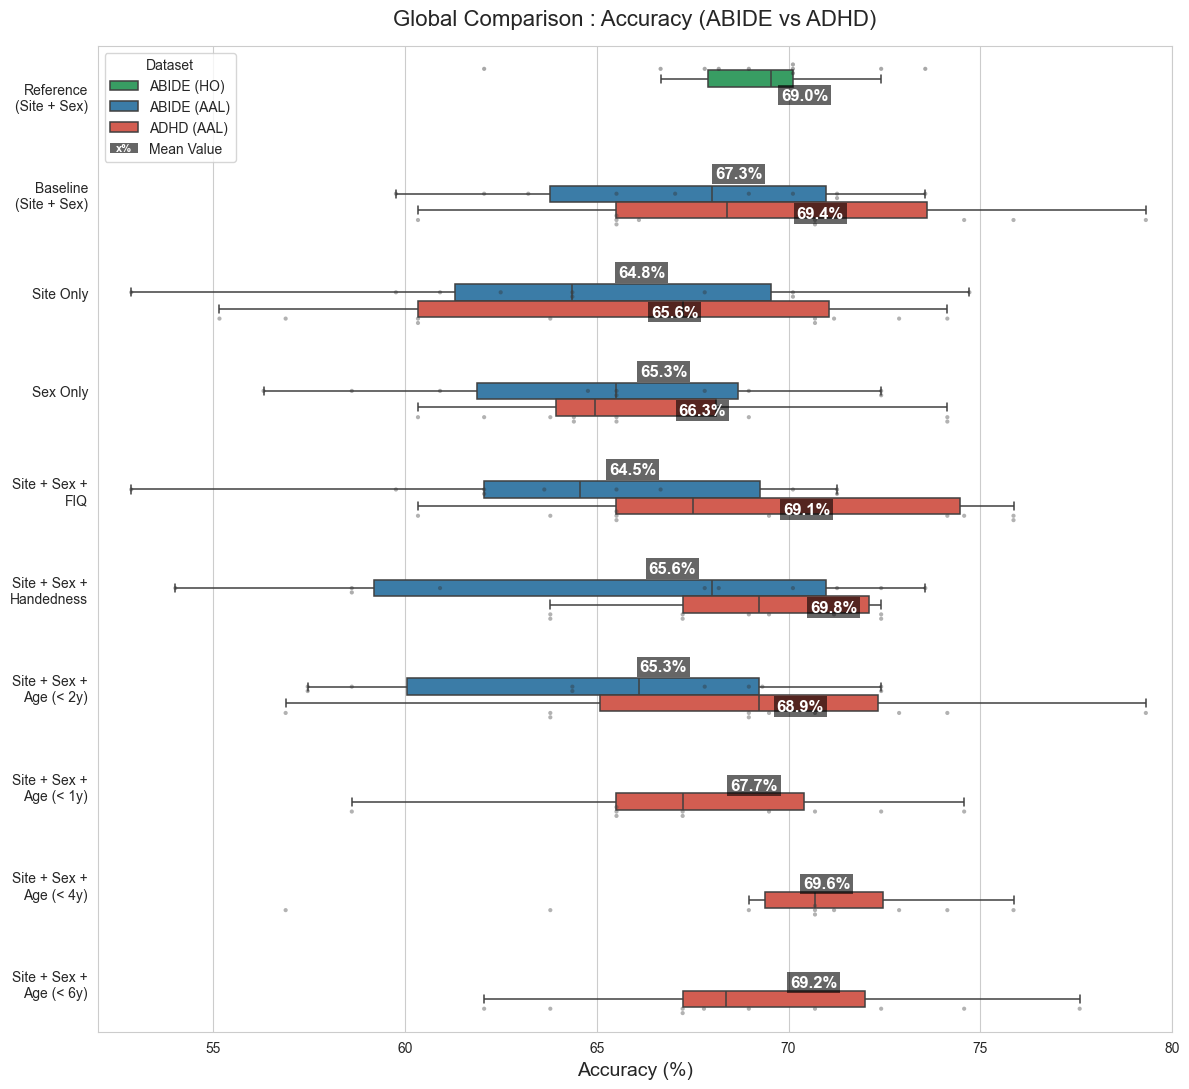

/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/2155093274.py:150: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.25'` for the same effect.

  sns.swarmplot(


✅ Graphique AUC sauvegardé : Global_Result_AUC_Final.png


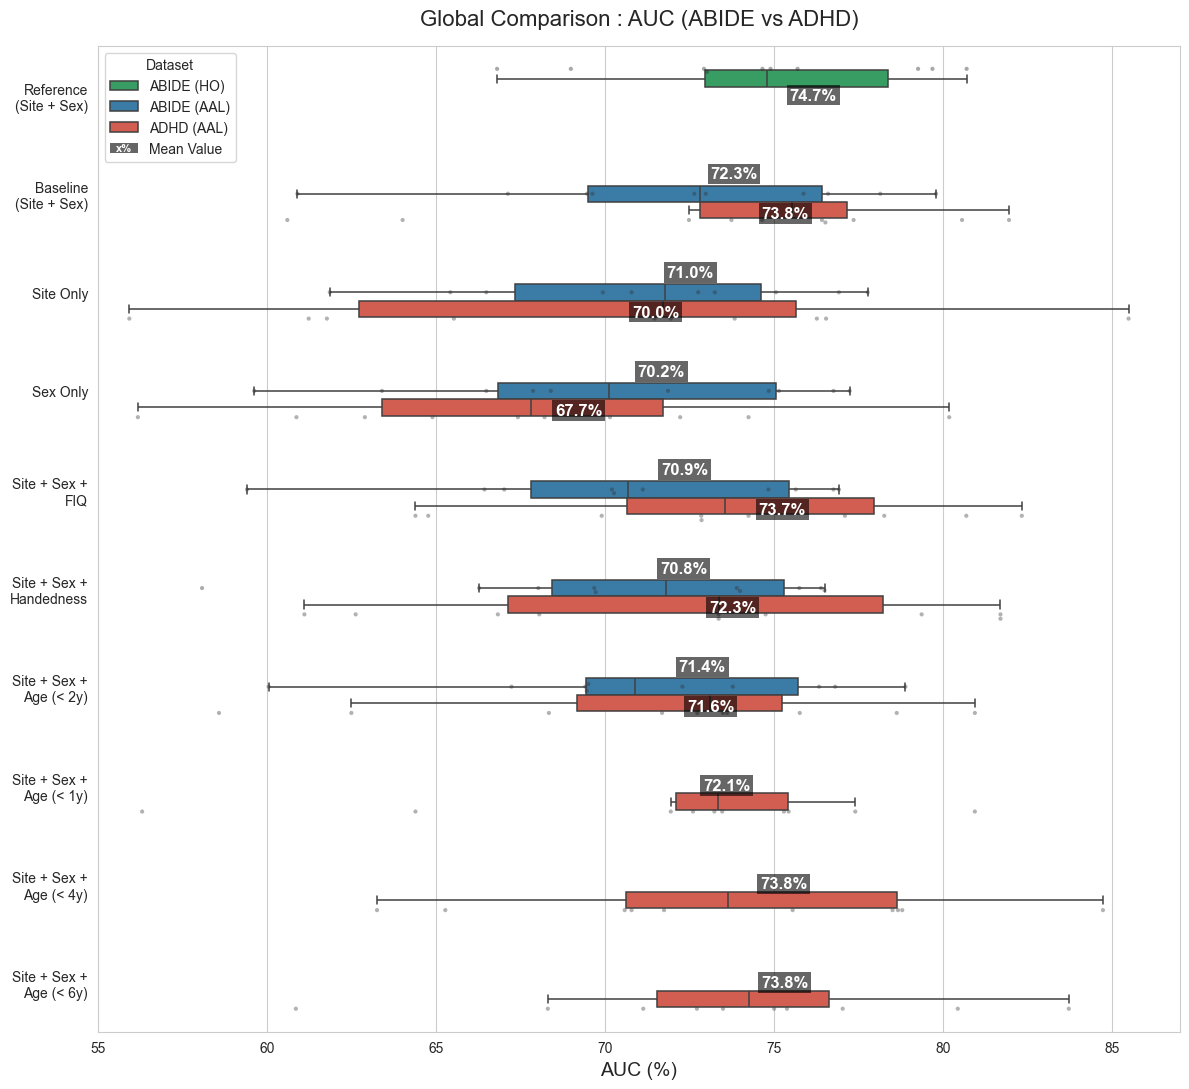

In [85]:
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.lines import Line2D
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import textwrap
from matplotlib.patches import Patch, Rectangle
from matplotlib.legend_handler import HandlerBase

# --- 1. CONFIGURATION ---
abide_dir = 'ABIDE_results'
adhd_dir = 'ADHD_results'

# MAPPING DES FICHIERS (Sans MedStatus)
files_map = {
    # --- REFERENCE ---
    ('Reference (Site + Sex)', 'ABIDE (HO)'): os.path.join(abide_dir, 'ABIDE_classification.mat'),

    # --- BASELINE ---
    ('Baseline (Site + Sex)', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_SEX_SITE.mat'),
    ('Baseline (Site + Sex)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site.mat'),

    # --- ABLATION ---
    ('Site Only', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_siteeabide.mat'),
    ('Site Only', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_siteeadhd.mat'),
    ('Sex Only', 'ABIDE (AAL)'):  os.path.join(abide_dir, 'ABIDE_classification_sexxabide.mat'),
    ('Sex Only', 'ADHD (AAL)'):   os.path.join(adhd_dir, 'ADHD_classification_sexxadhd.mat'),

    # --- HYPOTHESES ---
    ('Site + Sex + FIQ', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_FIQ_SEX_SITE.mat'),
    ('Site + Sex + FIQ', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_FIQ.mat'),
    
    ('Site + Sex + Handedness', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_Handedness_SEX_SITE.mat'),
    ('Site + Sex + Handedness', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Handedness.mat'),
    
    # SUPPRIMÉ : Site + Sex + MedStatus

    # --- AGE SENSITIVITY ---
    # ABIDE standard avec ADHD < 2y
    ('Site + Sex + Age (< 2y)', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_AGE_SEX_SITE.mat'),
    ('Site + Sex + Age (< 2y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-2ans.mat'),
    
    ('Site + Sex + Age (< 1y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-1ans.mat'),
    ('Site + Sex + Age (< 4y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-4ans.mat'),
    ('Site + Sex + Age (< 6y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-6ans.mat'),
}

# ORDRE D'AFFICHAGE (Mis à jour sans MedStatus)
plot_order = [
    'Reference (Site + Sex)',
    'Baseline (Site + Sex)',
    'Site Only',
    'Sex Only',
    'Site + Sex + FIQ',
    'Site + Sex + Handedness',
    # SUPPRIMÉ : 'Site + Sex + MedStatus',
    'Site + Sex + Age (< 2y)',
    'Site + Sex + Age (< 1y)',
    'Site + Sex + Age (< 4y)',
    'Site + Sex + Age (< 6y)'
]

# --- 2. EXTRACTION DES DONNÉES ---
data_acc = []
data_auc = []

print("Chargement des données...")
for (label, dataset_tag), filepath in files_map.items():
    if not os.path.exists(filepath):
        print(f"⚠️ MANQUANT : {filepath}")
        continue
        
    try:
        mat = sio.loadmat(filepath)
        
        # 1. ACCURACY
        if 'acc' in mat:
            acc_vals = mat['acc'].flatten()
            if 'folds' in mat:
                fold_sizes = mat['folds'].flatten()
                acc_percent = (acc_vals / fold_sizes) * 100
            else:
                denom = 582/10 if 'ADHD' in dataset_tag else 871/10
                acc_percent = (acc_vals / denom) * 100
            
            for v in acc_percent:
                data_acc.append({'Configuration': label, 'Dataset': dataset_tag, 'Score': v})

        # 2. AUC
        if 'auc' in mat:
            auc_vals = mat['auc'].flatten()
            auc_percent = auc_vals * 100
            
            for v in auc_percent:
                data_auc.append({'Configuration': label, 'Dataset': dataset_tag, 'Score': v})
                
    except Exception as e:
        print(f"❌ Erreur {filepath}: {e}")

df_acc = pd.DataFrame(data_acc)
df_auc = pd.DataFrame(data_auc)

import textwrap # <--- NOUVEL IMPORT NÉCESSAIRE
from matplotlib.patches import Patch # Pour la légende personnalisée

# --- 1. CLASSE POUR LE SYMBOLE PERSONNALISÉ ---
class TextHandler(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        r = Rectangle([xdescent, ydescent], width, height, facecolor='black', alpha=0.6, edgecolor='none')
        t = plt.Text(xdescent + width / 2, ydescent + height / 2, "x%", 
                     ha='center', va='center', color='white', 
                     fontweight='bold', fontsize=fontsize-2)
        return [r, t]

# --- 2. FONCTION DE PLOT ---
def plot_global(df, metric_name, filename, x_limit):
    sns.set_style("whitegrid")
    # J'augmente un peu la hauteur (11) car avec des légendes plus serrées, 
    # elles prennent plus de lignes en hauteur.
    plt.figure(figsize=(12, 11))

    palette = {
        'ABIDE (HO)': '#27ae60',   # Vert
        'ABIDE (AAL)': '#2980b9',  # Bleu
        'ADHD (AAL)': '#e74c3c'    # Rouge
    }

    # --- A. MODIFICATION 1 : SERRER LES LÉGENDES ---
    # Réduire ce chiffre pour réduire la largeur de la colonne de gauche
    wrap_width = 12  
    
    df['Config_Wrapped'] = df['Configuration'].apply(lambda x: textwrap.fill(x, wrap_width))
    wrapped_order = [textwrap.fill(x, wrap_width) for x in plot_order]

    # --- PLOTS ---
    ax = sns.boxplot(
        x='Score', y='Config_Wrapped', hue='Dataset', data=df,
        order=wrapped_order, palette=palette,
        dodge=True, width=0.5, linewidth=1.1, fliersize=0
    )
    
    sns.swarmplot(
        x='Score', y='Config_Wrapped', hue='Dataset', data=df,
        order=wrapped_order, dodge=True, size=3, color=".25", alpha=0.4
    )

    # --- MOYENNES ---
    means = df.groupby(['Config_Wrapped', 'Dataset'])['Score'].mean()
    hue_order = ['ABIDE (HO)', 'ABIDE (AAL)', 'ADHD (AAL)']
    
    for i, config in enumerate(wrapped_order):
        datasets_in_row = [d for d in hue_order if (config, d) in means.index]
        
        # Ajustement des offsets verticaux selon le nombre de barres
        offsets = {}
        if len(datasets_in_row) == 1: offsets = {datasets_in_row[0]: 0}
        elif len(datasets_in_row) == 2: offsets = {datasets_in_row[0]: -0.2, datasets_in_row[1]: 0.2}
        elif len(datasets_in_row) == 3: offsets = {datasets_in_row[0]: -0.26, datasets_in_row[1]: 0, datasets_in_row[2]: 0.26}
            
        for ds in datasets_in_row:
            val = means.loc[(config, ds)]
            ax.text(val + 0.8, i + offsets[ds], f"{val:.1f}%", 
                    ha='left', va='center', 
                    color='white', fontweight='bold', fontsize=12,
                    bbox=dict(facecolor='black', alpha=0.6, edgecolor='none', pad=2))

    # --- ESTHÉTIQUE ---
    plt.title(f'Global Comparison : {metric_name} (ABIDE vs ADHD)', fontsize=16, pad=15)
    plt.xlabel(f'{metric_name} (%)', fontsize=14)
    plt.ylabel('')
    
    # --- B. MODIFICATION 2 : RESPECT STRICT DU XLIM ---
    # J'ai supprimé le calcul "+3". Le graph s'arrêtera exactement où vous lui dites.
    plt.xlim(x_limit) 
    
    # --- LÉGENDE ---
    handles, labels = ax.get_legend_handles_labels()
    unique_legend = {}
    for h, l in zip(handles, labels):
        if l not in unique_legend: unique_legend[l] = h
            
    dummy_handle = Rectangle((0, 0), 1, 1, facecolor='black') 
    final_handles = list(unique_legend.values()) + [dummy_handle]
    final_labels = list(unique_legend.keys()) + ['Mean Value']

    plt.legend(
        handles=final_handles, 
        labels=final_labels, 
        handler_map={dummy_handle: TextHandler()},
        title='Dataset', 
        fontsize=10, 
        loc='upper left' # ou 'lower right' si ça gêne en haut
    )

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    print(f"✅ Graphique {metric_name} sauvegardé : {filename}")
    plt.show()

# --- APPEL DES FONCTIONS (Ajustez vos x_limit ici manuellement si le texte coupe) ---
# Exemple : j'ai mis 85 pour être large, car je n'ajoute plus de buffer automatique
plot_global(df_acc, 'Accuracy', 'Global_Result_Accuracy_Final.png', x_limit=(52, 80))
plot_global(df_auc, 'AUC', 'Global_Result_AUC_Final.png', x_limit=(55,87))

In [74]:
!pip install jinja2


  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)


In [75]:
import scipy.io as sio
import numpy as np
import pandas as pd
import os

# --- 1. CONFIGURATION ---
abide_dir = 'ABIDE_results'
adhd_dir = 'ADHD_results'

# MAPPING DES FICHIERS (Identique à ton code)
files_map = {
    # --- REFERENCE ---
    ('Reference (Site + Sex)', 'ABIDE (HO)'): os.path.join(abide_dir, 'ABIDE_classification.mat'),

    # --- BASELINE ---
    ('Baseline (Site + Sex)', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_SEX_SITE.mat'),
    ('Baseline (Site + Sex)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site.mat'),

    # --- ABLATION ---
    ('Site Only', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_siteeabide.mat'),
    ('Site Only', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_siteeadhd.mat'),
    ('Sex Only', 'ABIDE (AAL)'):  os.path.join(abide_dir, 'ABIDE_classification_sexxabide.mat'),
    ('Sex Only', 'ADHD (AAL)'):   os.path.join(adhd_dir, 'ADHD_classification_sexxadhd.mat'),

    # --- HYPOTHESES ---
    ('Site + Sex + FIQ', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_FIQ_SEX_SITE.mat'),
    ('Site + Sex + FIQ', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_FIQ.mat'),
    
    ('Site + Sex + Handedness', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_Handedness_SEX_SITE.mat'),
    ('Site + Sex + Handedness', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Handedness.mat'),
    
    # --- AGE SENSITIVITY ---
    ('Site + Sex + Age (< 2y)', 'ABIDE (AAL)'): os.path.join(abide_dir, 'ABIDE_classification_ABIDE_AAL_AGE_SEX_SITE.mat'),
    ('Site + Sex + Age (< 2y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-2ans.mat'),
    
    ('Site + Sex + Age (< 1y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-1ans.mat'),
    ('Site + Sex + Age (< 4y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-4ans.mat'),
    ('Site + Sex + Age (< 6y)', 'ADHD (AAL)'):  os.path.join(adhd_dir, 'ADHD_classification_Sexe_Site_Age_inf-6ans.mat'),
}

# ORDRE D'AFFICHAGE SOUHAITÉ
plot_order = [
    'Reference (Site + Sex)',
    'Baseline (Site + Sex)',
    'Site Only',
    'Sex Only',
    'Site + Sex + FIQ',
    'Site + Sex + Handedness',
    'Site + Sex + Age (< 2y)',
    'Site + Sex + Age (< 1y)',
    'Site + Sex + Age (< 4y)',
    'Site + Sex + Age (< 6y)'
]

# --- 2. EXTRACTION DES DONNÉES ---
data_acc = []
data_auc = []

print("Chargement et traitement des données...")
for (label, dataset_tag), filepath in files_map.items():
    if not os.path.exists(filepath):
        # print(f"⚠️ MANQUANT : {filepath}") # Décommenter pour voir les fichiers manquants
        continue
        
    try:
        mat = sio.loadmat(filepath)
        
        # 1. ACCURACY
        if 'acc' in mat:
            acc_vals = mat['acc'].flatten()
            if 'folds' in mat:
                fold_sizes = mat['folds'].flatten()
                acc_percent = (acc_vals / fold_sizes) * 100
            else:
                denom = 582/10 if 'ADHD' in dataset_tag else 871/10
                acc_percent = (acc_vals / denom) * 100
            
            for v in acc_percent:
                data_acc.append({'Configuration': label, 'Dataset': dataset_tag, 'Score': v})

        # 2. AUC
        if 'auc' in mat:
            auc_vals = mat['auc'].flatten()
            # On s'assure que c'est en pourcentage
            auc_percent = auc_vals * 100 if np.mean(auc_vals) < 1.1 else auc_vals
            
            for v in auc_percent:
                data_auc.append({'Configuration': label, 'Dataset': dataset_tag, 'Score': v})
                
    except Exception as e:
        print(f"❌ Erreur {filepath}: {e}")

# Création des DataFrames bruts
df_acc = pd.DataFrame(data_acc)
df_auc = pd.DataFrame(data_auc)

# --- 3. CRÉATION DU TABLEAU BILAN ---

def create_summary_table(df_raw, metric_name):
    """Calcule Moyenne et Std et formate le texte."""
    if df_raw.empty:
        return pd.DataFrame()
    
    # Agrégation : Moyenne et Écart-type par Config/Dataset
    summary = df_raw.groupby(['Configuration', 'Dataset'])['Score'].agg(['mean', 'std']).reset_index()
    
    # Formatage : "Moyenne ± Std"
    # On arrondit à 2 décimales pour la propreté (ex: 69.42 ± 5.10)
    summary[metric_name] = (
        summary['mean'].round(2).astype(str) + 
        " ± " + 
        summary['std'].round(2).astype(str)
    )
    
    return summary[['Configuration', 'Dataset', metric_name]]

# Générer les résumés pour ACC et AUC
summary_acc = create_summary_table(df_acc, 'Accuracy (%)')
summary_auc = create_summary_table(df_auc, 'AUC (%)')

# Fusionner les deux tableaux sur Configuration et Dataset
final_table = pd.merge(summary_acc, summary_auc, on=['Configuration', 'Dataset'], how='outer')

# --- 4. TRI ET AFFICHAGE ---

# Définir l'ordre de tri personnalisé pour la colonne 'Configuration'
final_table['Configuration'] = pd.Categorical(final_table['Configuration'], categories=plot_order, ordered=True)

# Trier d'abord par Configuration (selon plot_order), puis par Dataset
final_table = final_table.sort_values(by=['Configuration', 'Dataset'])

# Affichage propre dans la console
print("\n" + "="*80)
print(f"{'TABLEAU BILAN DES RÉSULTATS':^80}")
print("="*80)
print(final_table.to_string(index=False))
print("="*80)

# Export optionnel en CSV
final_table.to_csv('Bilan_Resultats_Phenotypes.csv', index=False, sep=';', encoding='utf-8')
print("\n✅ Tableau sauvegardé sous 'Bilan_Resultats_Phenotypes.csv'")

# Export optionnel en format LaTeX pour ton article
latex_code = final_table.to_latex(index=False, float_format="%.2f", caption="Comparative Results Summary", label="tab:results_summary")
# print("\n--- Code LaTeX ---\n")
# print(latex_code)

Chargement et traitement des données...

                          TABLEAU BILAN DES RÉSULTATS                           
          Configuration     Dataset Accuracy (%)      AUC (%)
 Reference (Site + Sex)  ABIDE (HO)  69.0 ± 3.19 74.66 ± 4.51
  Baseline (Site + Sex) ABIDE (AAL) 67.28 ± 4.54 72.31 ± 5.71
  Baseline (Site + Sex)  ADHD (AAL) 69.41 ± 5.85 73.83 ± 6.76
              Site Only ABIDE (AAL) 64.76 ± 6.25 71.02 ± 5.18
              Site Only  ADHD (AAL) 65.61 ± 7.09  70.0 ± 8.85
               Sex Only ABIDE (AAL) 65.33 ± 5.43 70.16 ± 5.98
               Sex Only  ADHD (AAL) 66.33 ± 4.69 67.73 ± 6.95
       Site + Sex + FIQ ABIDE (AAL) 64.52 ± 5.76 70.86 ± 5.54
       Site + Sex + FIQ  ADHD (AAL) 69.06 ± 5.68 73.74 ± 6.13
Site + Sex + Handedness ABIDE (AAL) 65.55 ± 6.89 70.83 ± 5.77
Site + Sex + Handedness  ADHD (AAL) 69.76 ± 5.03 72.28 ± 7.46
Site + Sex + Age (< 2y) ABIDE (AAL) 65.32 ± 5.83 71.38 ± 5.51
Site + Sex + Age (< 2y)  ADHD (AAL) 68.89 ± 6.25 71.63 ± 6.88
Site + Sex

____

**Les graphs en dessous utilisent les données overfit sur ADHD (faux)**

Chargement des données...


/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/1390931542.py:87: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df,



✅ Graphique sauvegardé sous : resultats_comparatifs_boxplot_horizontal.png


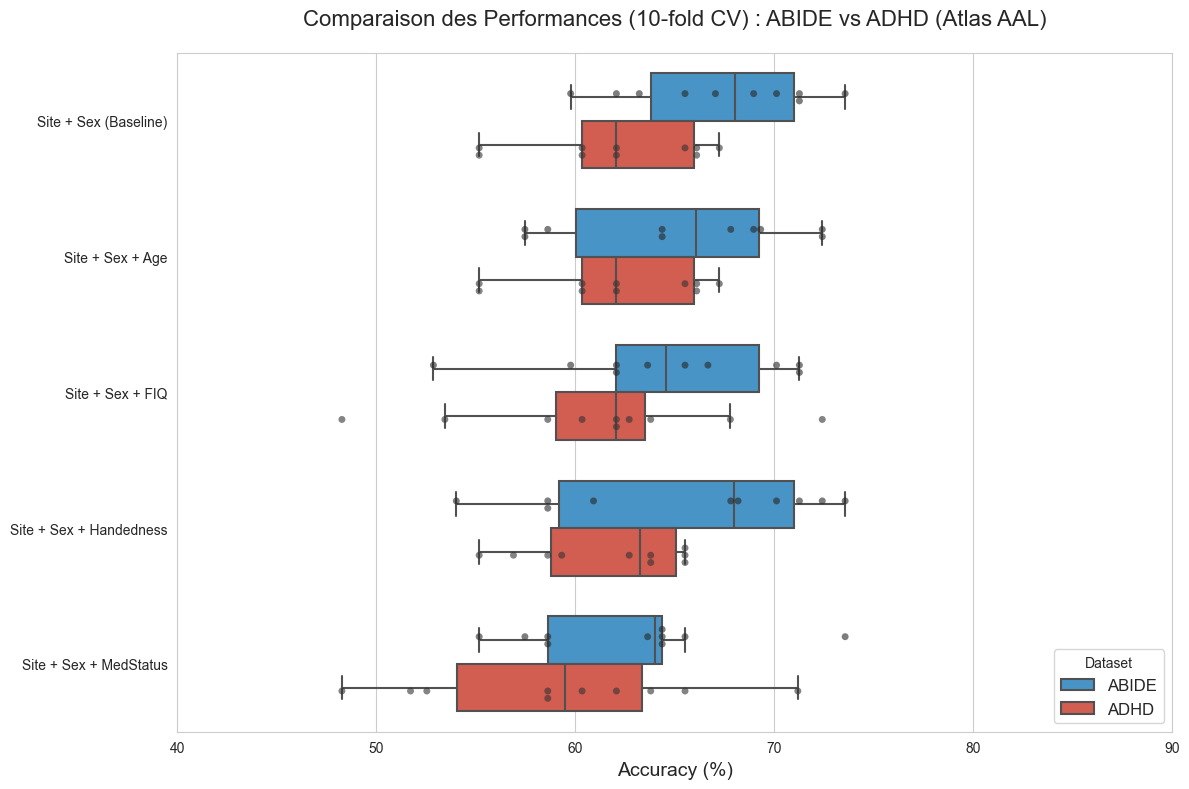

In [7]:
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 1. Configuration des fichiers ---
# Dictionnaire associant un nom lisible au fichier correspondant
files_map = {

    
    # ABIDE (AAL)
    ('ABIDE', 'Site + Sex (Baseline)'): 'ABIDE_classification_ABIDE_AAL_SEX_SITE.mat',
    ('ABIDE', 'Site + Sex + Age'):      'ABIDE_classification_ABIDE_AAL_AGE_SEX_SITE.mat',
    ('ABIDE', 'Site + Sex + FIQ'):      'ABIDE_classification_ABIDE_AAL_FIQ_SEX_SITE.mat',
    ('ABIDE', 'Site + Sex + Handedness'): 'ABIDE_classification_ABIDE_AAL_Handedness_SEX_SITE.mat',
    ('ABIDE', 'Site + Sex + MedStatus'):  'ABIDE_classification_ABIDE_AAL_MedStatus_SEX_SITE.mat',

    # ADHD (AAL)
    ('ADHD', 'Site + Sex (Baseline)'):  'ADHD_classification_ADHD_AAL_Site_Sex.mat',
    ('ADHD', 'Site + Sex + Age'):       'ADHD_classification_ADHD_AAL_Age_Site_Sex.mat',
    ('ADHD', 'Site + Sex + FIQ'):       'ADHD_classification_ADHD_AAL_FIQ_Site_Sex.mat',
    ('ADHD', 'Site + Sex + Handedness'): 'ADHD_classification_ADHD_AAL_Handedness_Site_Sex.mat',
    ('ADHD', 'Site + Sex + MedStatus'):  'ADHD_classification_ADHD_AAL_MedStatus_Site_Sex.mat',
}

# --- 2. Extraction des Données ---
data = []

print("Chargement des données...")
for (dataset, config), filename in files_map.items():
    if not os.path.exists(filename):
        print(f"⚠️ Fichier introuvable : {filename} (Ignoré)")
        continue
        
    try:
        mat = sio.loadmat(filename)
        
        # Récupération des counts corrects ('acc') et de la taille des folds ('folds')
        if 'acc' in mat and 'folds' in mat:
            acc_counts = mat['acc'].flatten()
            fold_sizes = mat['folds'].flatten()
            
            # Calcul du pourcentage d'accuracy pour chaque fold
            accuracies = (acc_counts / fold_sizes) * 100
            
            # Ajout dans la liste pour le DataFrame
            for acc in accuracies:
                data.append({
                    'Dataset': dataset,
                    'Configuration': config,
                    'Accuracy (%)': acc
                })
        else:
            print(f"⚠️ Clés manquantes dans {filename}")
            
    except Exception as e:
        print(f"❌ Erreur lecture {filename}: {e}")

# Création du DataFrame Pandas
df = pd.DataFrame(data)

# --- 3. Création du Graphique Horizontal ---
# Configuration du style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8)) # Taille ajustée pour l'horizontale

# Palette de couleurs (Bleu pour ABIDE, Rouge pour ADHD)
palette = {'ABIDE': '#3498db', 'ADHD': '#e74c3c'}

# Ordre d'affichage des configurations (de haut en bas)
order = [
    'Site + Sex (Baseline)', 
    'Site + Sex + Age', 
    'Site + Sex + FIQ', 
    'Site + Sex + Handedness', 
    'Site + Sex + MedStatus'
]

# Création du Boxplot Horizontal
# Note : on met 'Accuracy' sur X et 'Configuration' sur Y
ax = sns.boxplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df, 
                 order=order, palette=palette, width=0.7, linewidth=1.5, fliersize=0)

# Ajout des points individuels (Swarmplot) - attention à 'orient="h"'
sns.swarmplot(x='Accuracy (%)', y='Configuration', hue='Dataset', data=df, 
              order=order, dodge=True, size=5, color=".2", alpha=0.6, orient="h")

# --- 4. Mise en forme ---
plt.title('Comparaison des Performances (10-fold CV) : ABIDE vs ADHD (Atlas AAL)', fontsize=16, pad=20)
plt.xlabel('Accuracy (%)', fontsize=14)
plt.ylabel('', fontsize=14) # Pas besoin de label Y, les catégories suffisent
plt.xlim(40, 90) # Ajustez selon vos besoins

# Légende propre (on ne garde que les 2 premiers éléments pour éviter les doublons du swarmplot)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], title='Dataset', fontsize=12, loc='lower right')

plt.tight_layout()

# Sauvegarde
output_file = 'resultats_comparatifs_boxplot_horizontal.png'
plt.savefig(output_file, dpi=300)
print(f"\n✅ Graphique sauvegardé sous : {output_file}")

plt.show()

## HO VS AAL

Chargement des données...


/var/folders/f_/4gfz10w979537kpq89cc5y7c0000gn/T/ipykernel_11366/3507006124.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Accuracy (%)', y='Atlas', data=df,



✅ Graphique sauvegardé sous : comparaison_HO_AAL_horizontal.png


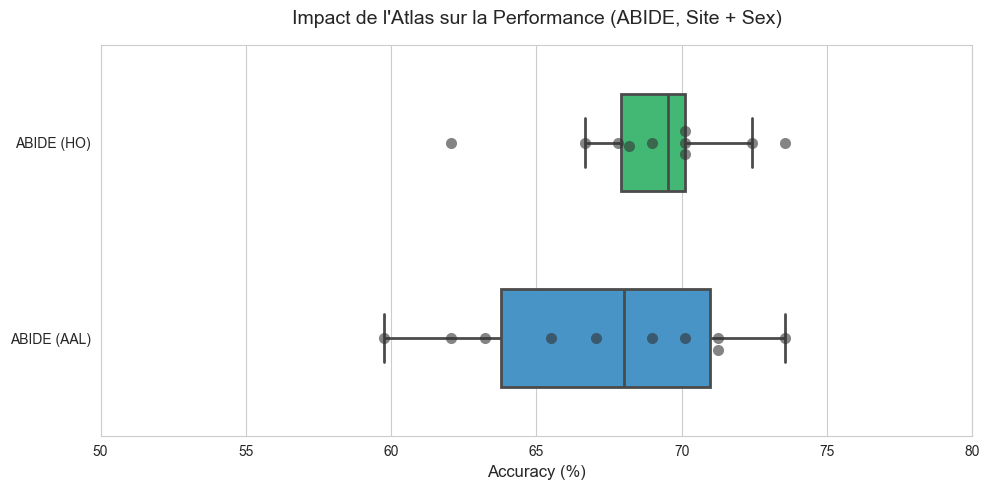

In [15]:
# --- 1. Configuration des fichiers à comparer ---
files_map = {
    'ABIDE (HO)': 'results_folds10/ABIDE_classification.mat',
    'ABIDE (AAL)': 'ABIDE_classification_ABIDE_AAL_SEX_SITE.mat'
}

# --- 2. Extraction des Données ---
data = []

print("Chargement des données...")
for label, filename in files_map.items():
    if not os.path.exists(filename):
        print(f"⚠️ Fichier introuvable : {filename}")
        continue
        
    try:
        mat = sio.loadmat(filename)
        
        # Vérification des clés
        if 'acc' in mat and 'folds' in mat:
            # Aplatir les tableaux
            acc_counts = mat['acc'].flatten()
            fold_sizes = mat['folds'].flatten()
            
            # Calcul du pourcentage d'accuracy pour chaque fold
            accuracies = (acc_counts / fold_sizes) * 100
            
            # Ajout dans la liste
            for acc in accuracies:
                data.append({
                    'Atlas': label,
                    'Accuracy (%)': acc
                })
        else:
            print(f"⚠️ Clés manquantes dans {filename}")
            
    except Exception as e:
        print(f"❌ Erreur lecture {filename}: {e}")

# Création du DataFrame
df = pd.DataFrame(data)

# --- 3. Création du Graphique Horizontal ---
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))  # Format plus large que haut

# Palette de couleurs (Vert pour HO, Bleu pour AAL)
palette = {'ABIDE (HO)': '#2ecc71', 'ABIDE (AAL)': '#3498db'}

# Création du Boxplot Horizontal
# Note : on inverse X et Y ici
ax = sns.boxplot(x='Accuracy (%)', y='Atlas', data=df, 
                 palette=palette, width=0.5, linewidth=2, fliersize=0)

# Ajout des points individuels (Swarmplot)
# Important : orient="h" pour l'horizontale
sns.swarmplot(x='Accuracy (%)', y='Atlas', data=df, 
              color=".2", size=8, alpha=0.6, orient="h")

# --- 4. Mise en forme ---
plt.title('Impact de l\'Atlas sur la Performance (ABIDE, Site + Sex)', fontsize=14, pad=15)
plt.xlabel('Accuracy (%)', fontsize=12)
plt.ylabel('', fontsize=12)  # Pas de label Y nécessaire, les noms sont clairs
plt.xlim(50, 80)  # Ajustez les limites de l'axe X si besoin

plt.tight_layout()

# Sauvegarde
output_file = 'comparaison_HO_AAL_horizontal.png'
plt.savefig(output_file, dpi=300)
print(f"\n✅ Graphique sauvegardé sous : {output_file}")

plt.show()